In [1]:
from data_loaders import load_mnist
import numpy as np
import matplotlib.pyplot as plt
import os
from model import * 
import torch
from PIL import Image
import torchvision
from torchvision import datasets, transforms
import torch
from constants import * 
import torch.nn.functional as functional
from tqdm import tqdm
import imageio

In [6]:
def load_mnist(batch_size, rotate=0, scale=1):
  dataset_transform = transforms.Compose([
               transforms.RandomAffine([rotate, rotate+1], scale=[scale, scale]),
               transforms.ToTensor(),
               transforms.Normalize((0.1307,), (0.3081,))
           ])
  
  train_dataset = datasets.MNIST('../data', 
                               train=True, 
                               download=True, 
                               transform=dataset_transform)
  test_dataset = datasets.MNIST('../data', 
                                 train=False, 
                                 download=True, 
                                 transform=dataset_transform)


  train_loader = torch.utils.data.DataLoader(train_dataset, 
                                             batch_size=batch_size,
                                             shuffle=True)
  test_loader = torch.utils.data.DataLoader(test_dataset, 
                                             batch_size=batch_size,
                                             shuffle=False)
  return train_loader, test_loader



In [7]:
capsnet = CapsNet(reconstruction_type="FC")
capsnet.load_state_dict(torch.load("saved_models/model36.pt"))
capsnet.cuda()
""

''

In [4]:
iter(load_mnist(20)[1]).next()[1]

tensor([ 7,  2,  1,  0,  4,  1,  4,  9,  5,  9,  0,  6,  9,  0,
         1,  5,  9,  7,  3,  4])

In [ ]:
, _

 22%|██▏       | 20/90 [00:08<00:29,  2.40it/s]/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
100%|██████████| 90/90 [00:38<00:00,  2.34it/s]


'\nfig = plt.figure()\nplt.subplot(1,2,1)\nplt.bar(range(0,10), output[j])\npred = output[j].max(dim=0)[1].item()\nplt.bar(pred, output[j][pred])\nplt.xticks(range(0,10))\nplt.subplot(1,2,2)\nplt.imshow(im, cmap="gray")\nplt.savefig("test.png")\n'

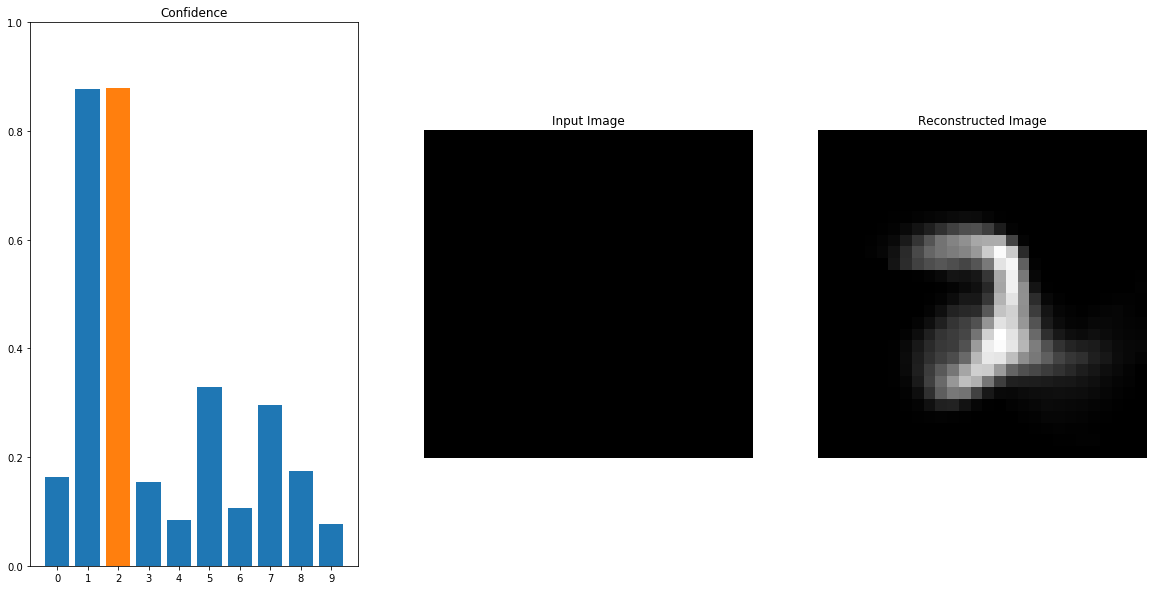

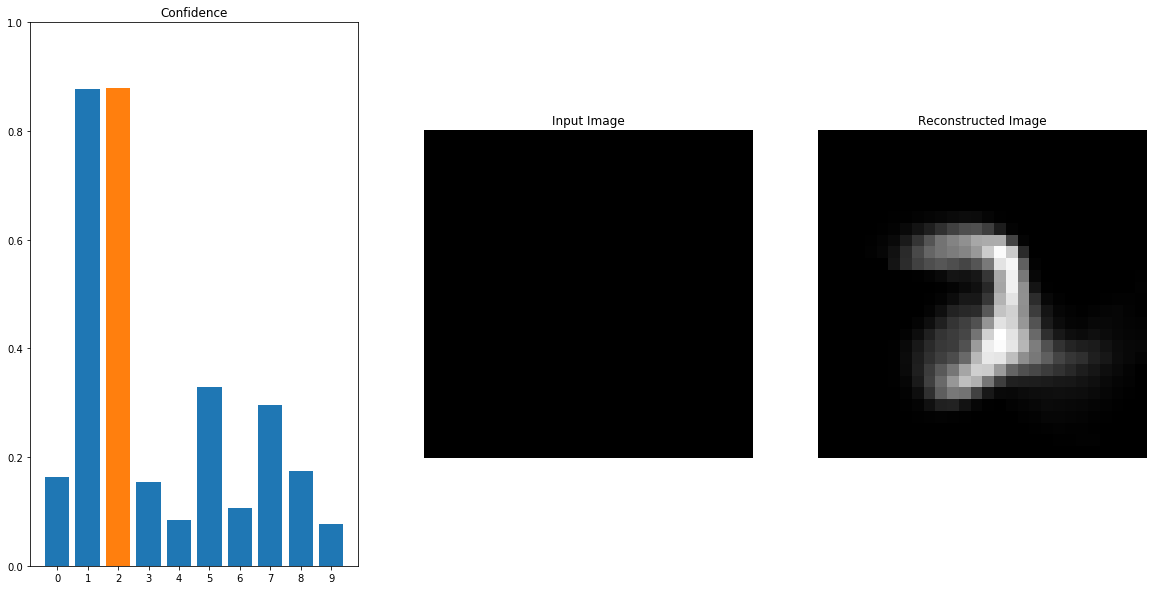

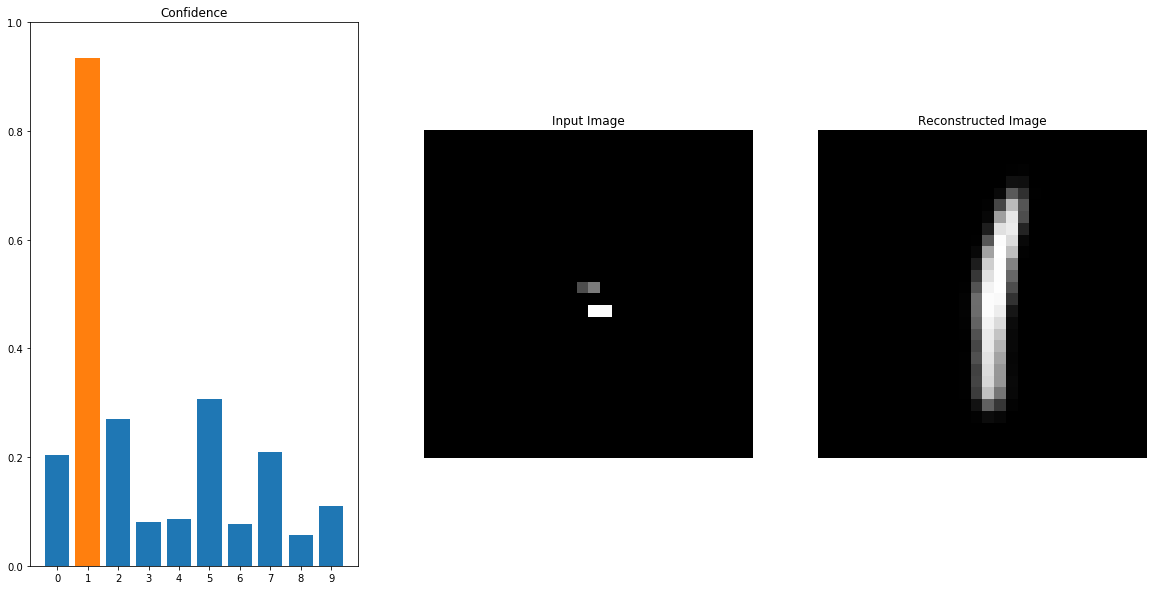

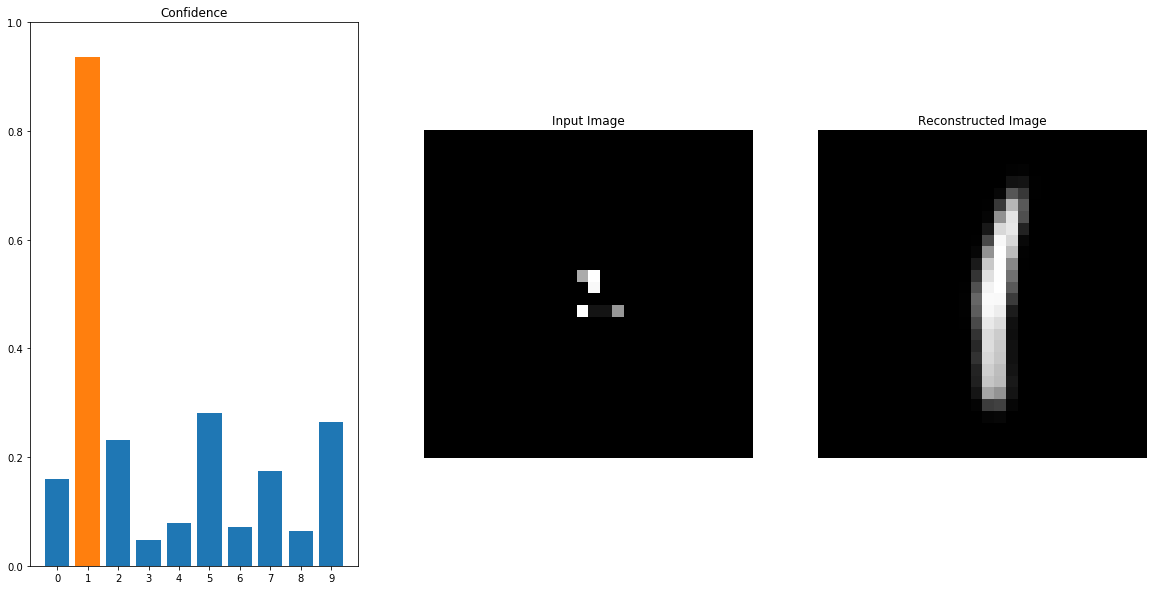

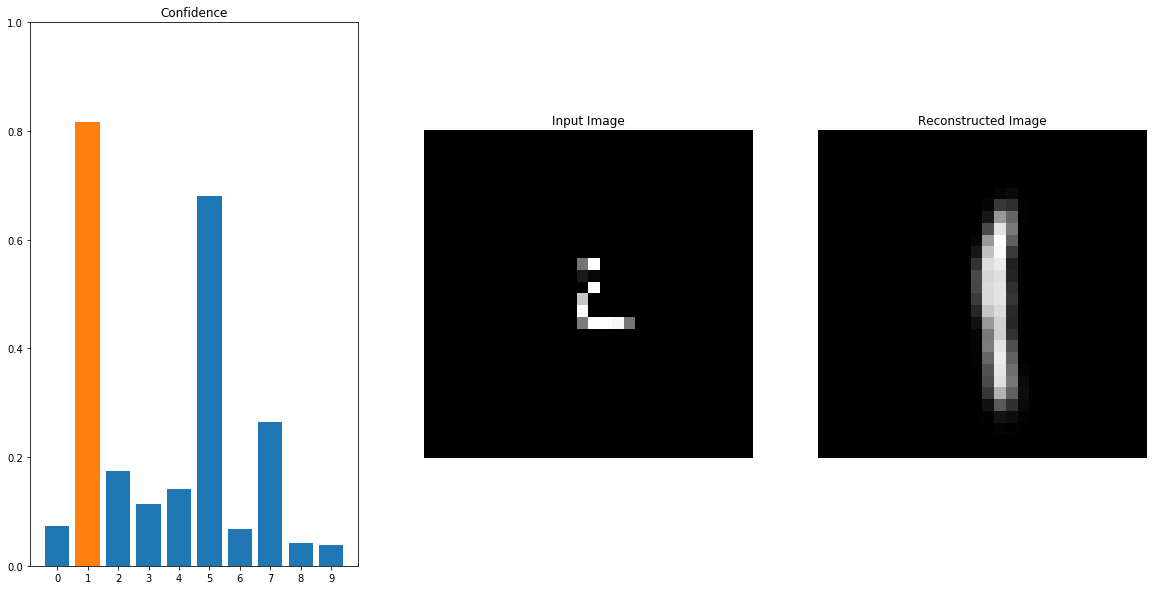

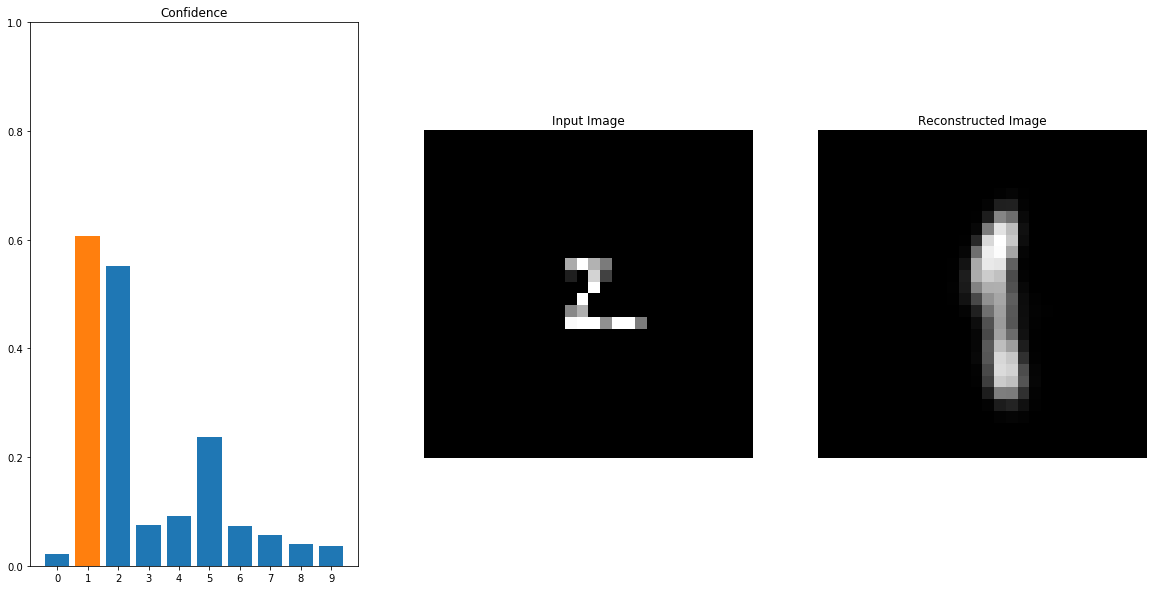

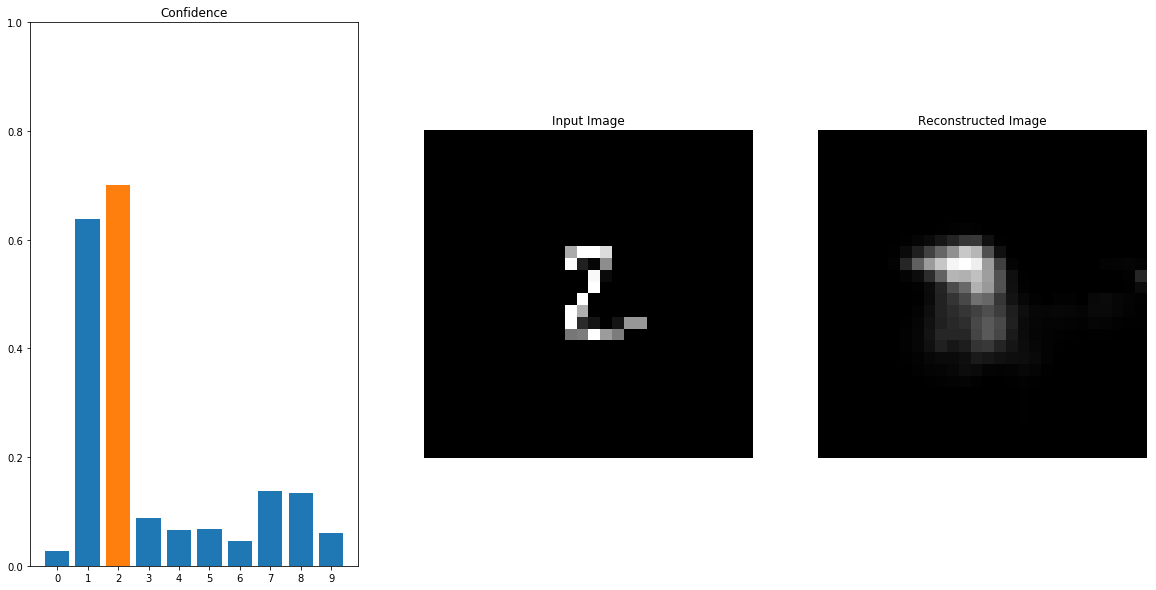

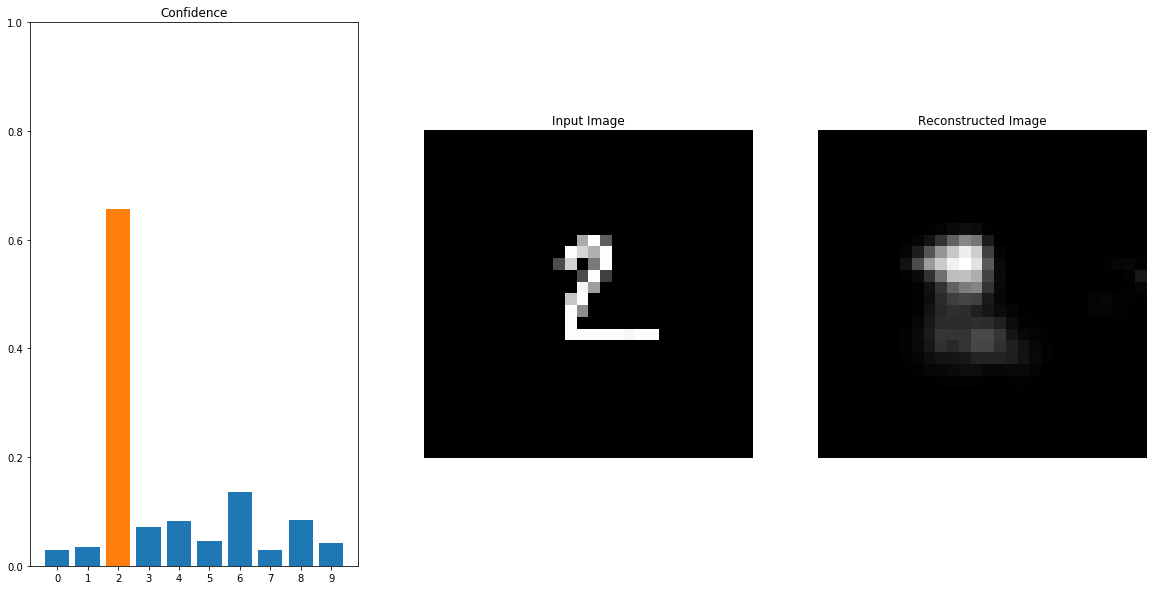

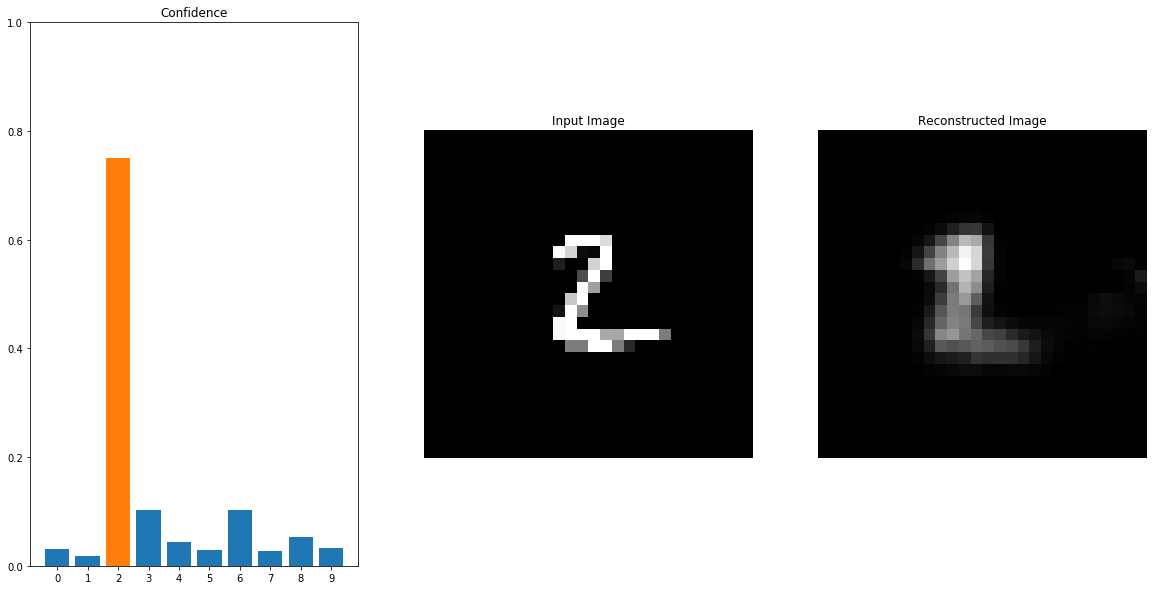

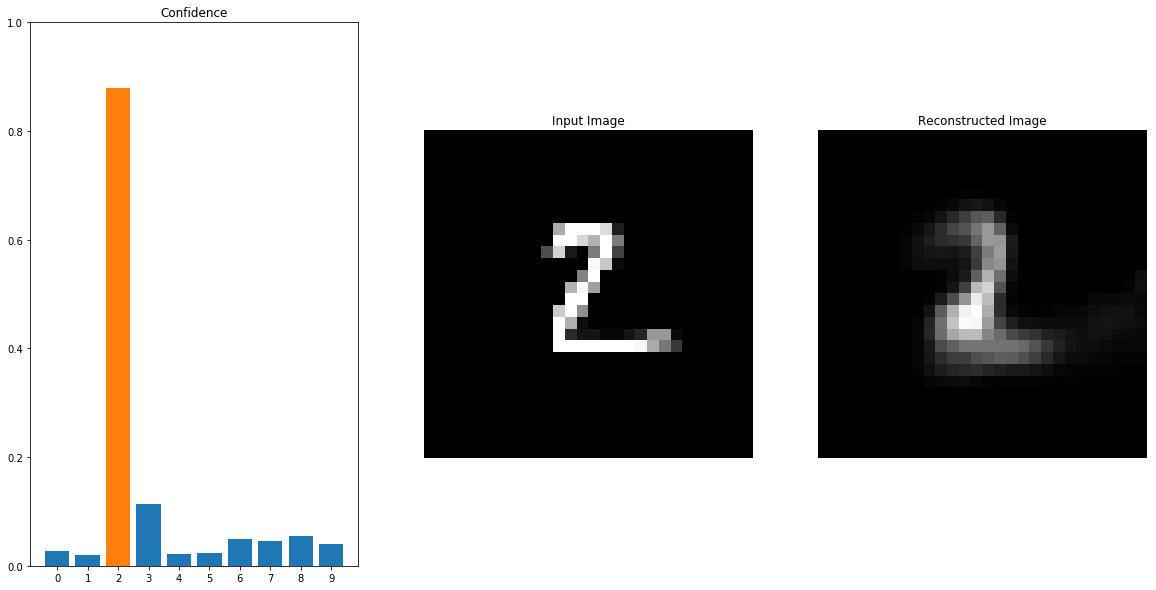

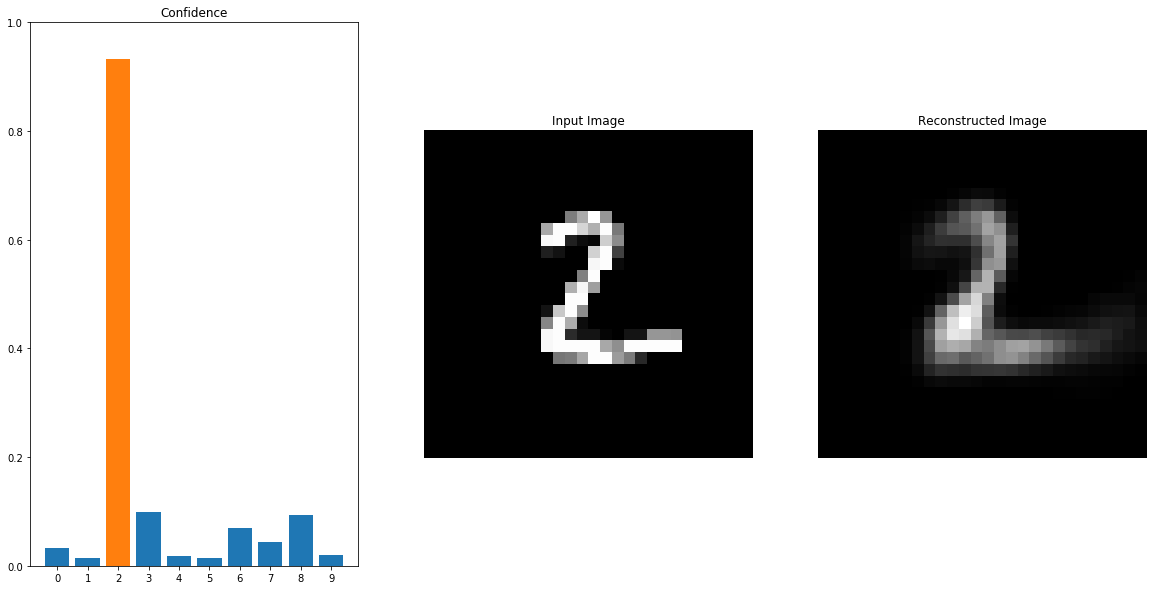

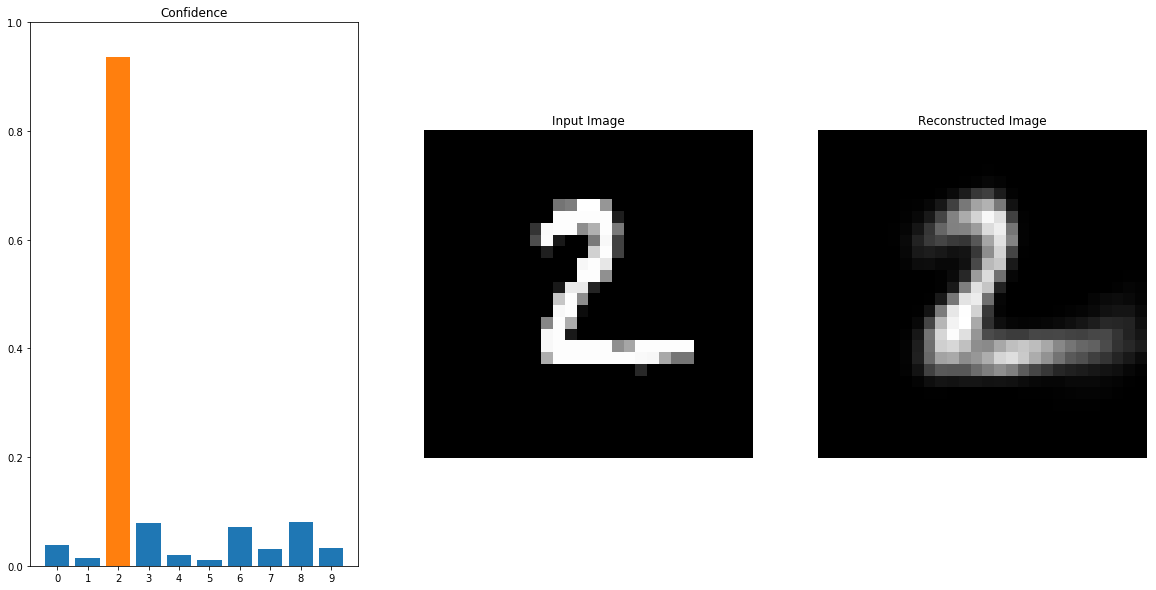

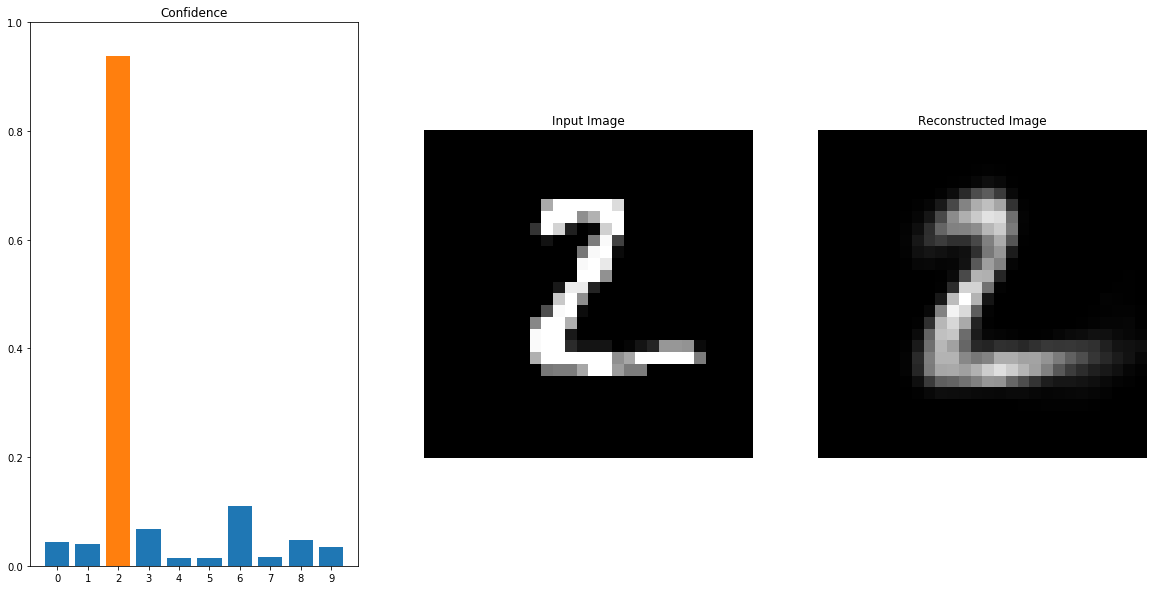

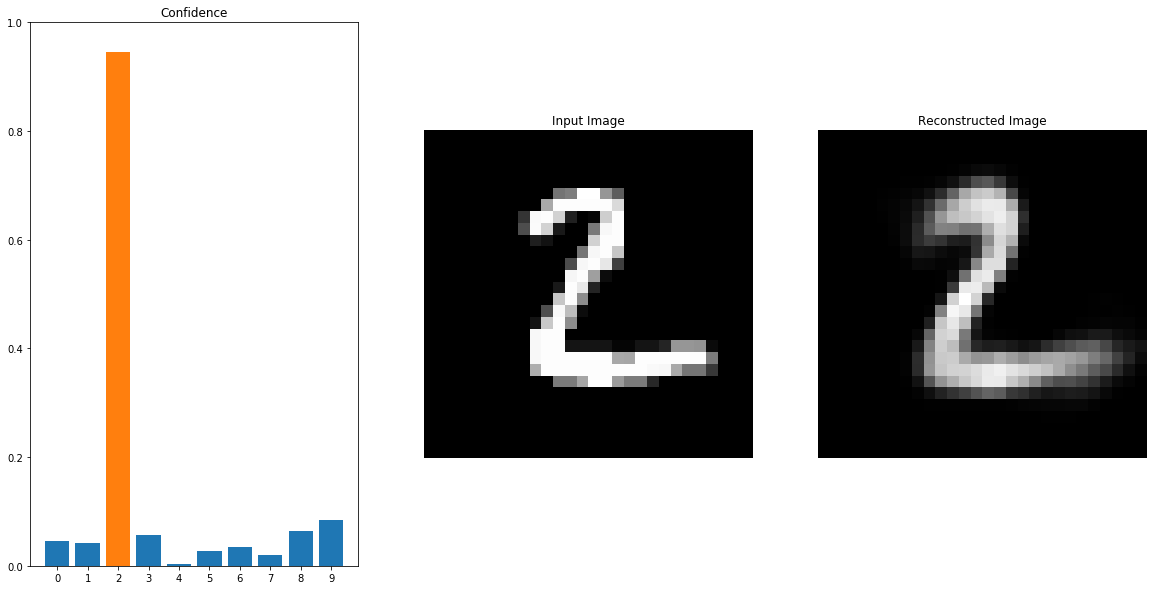

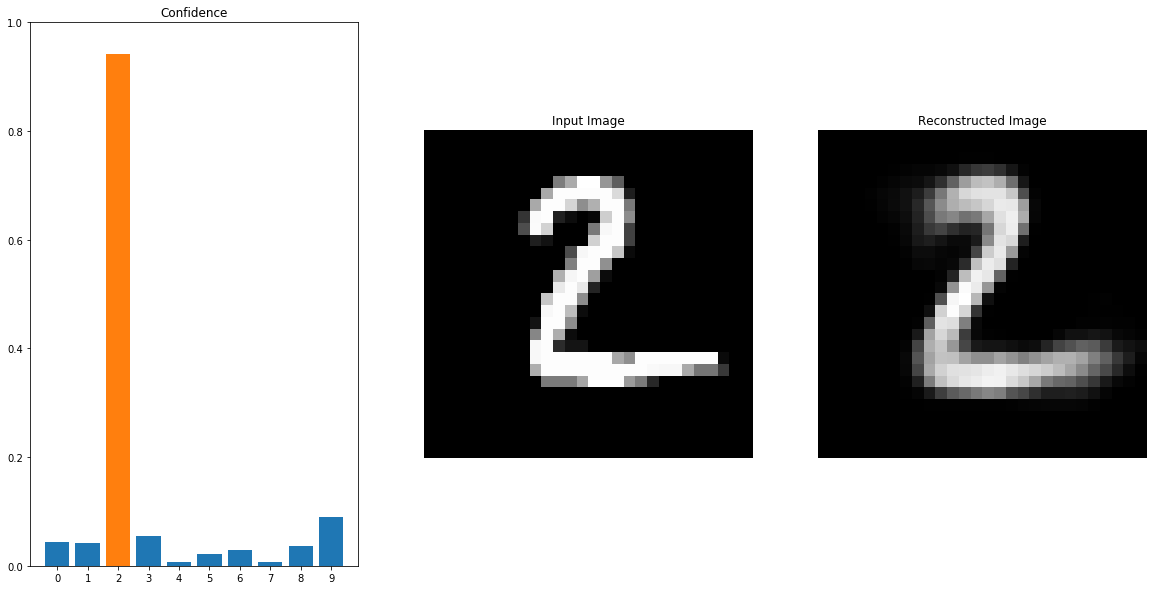

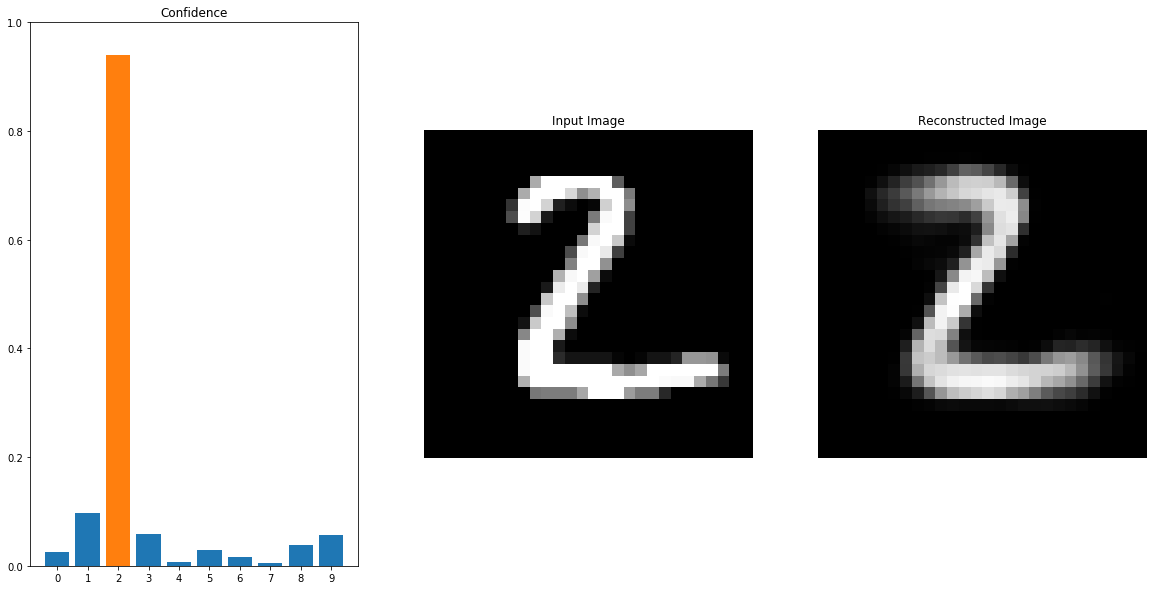

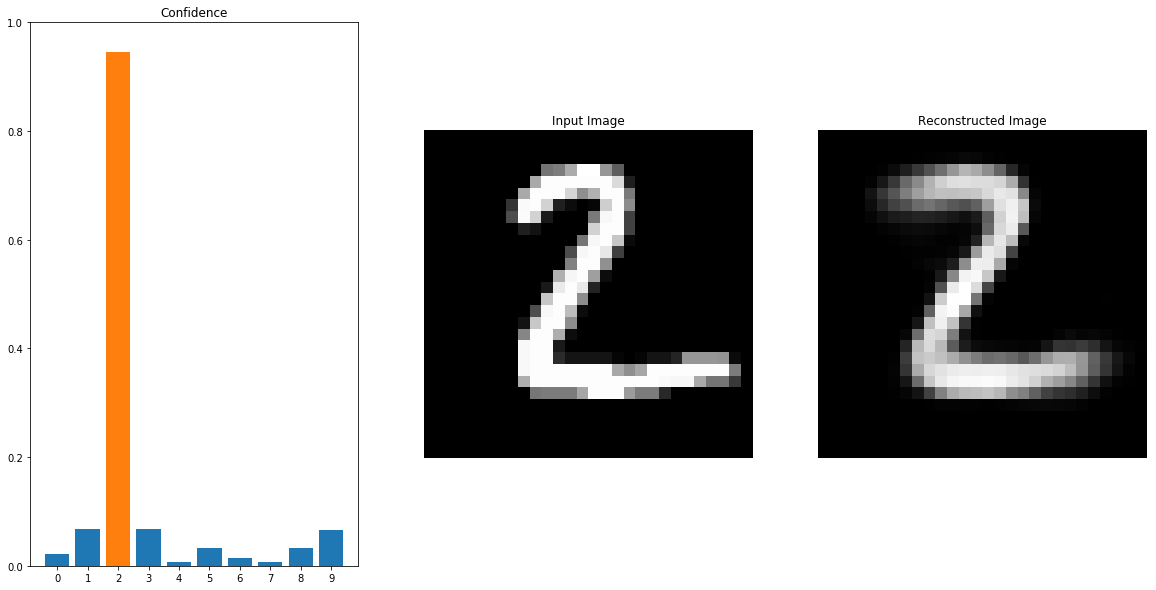

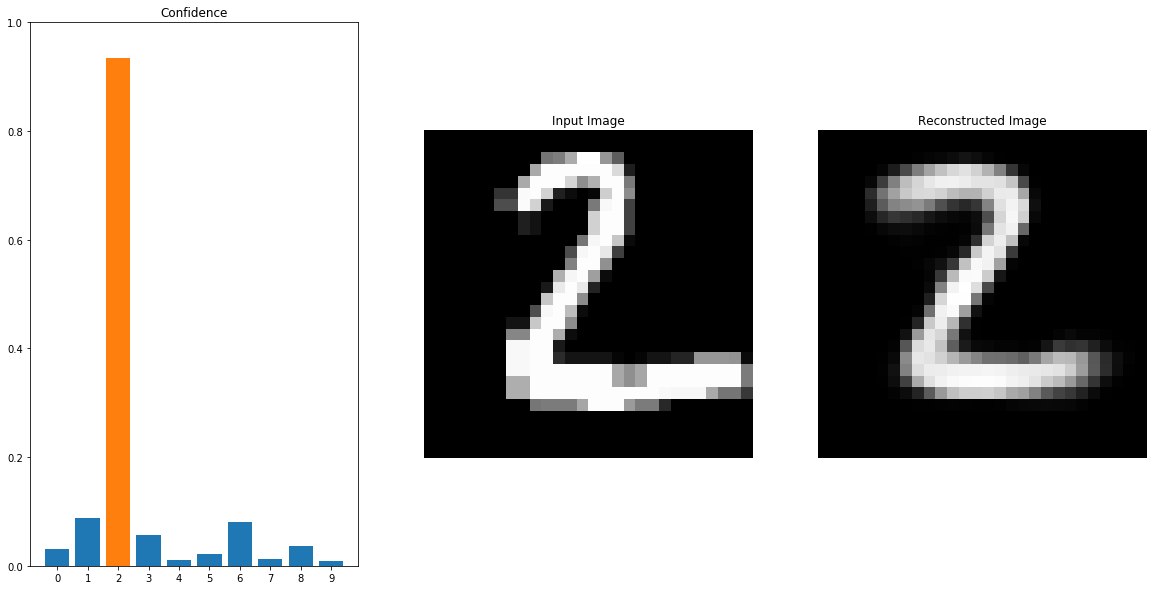

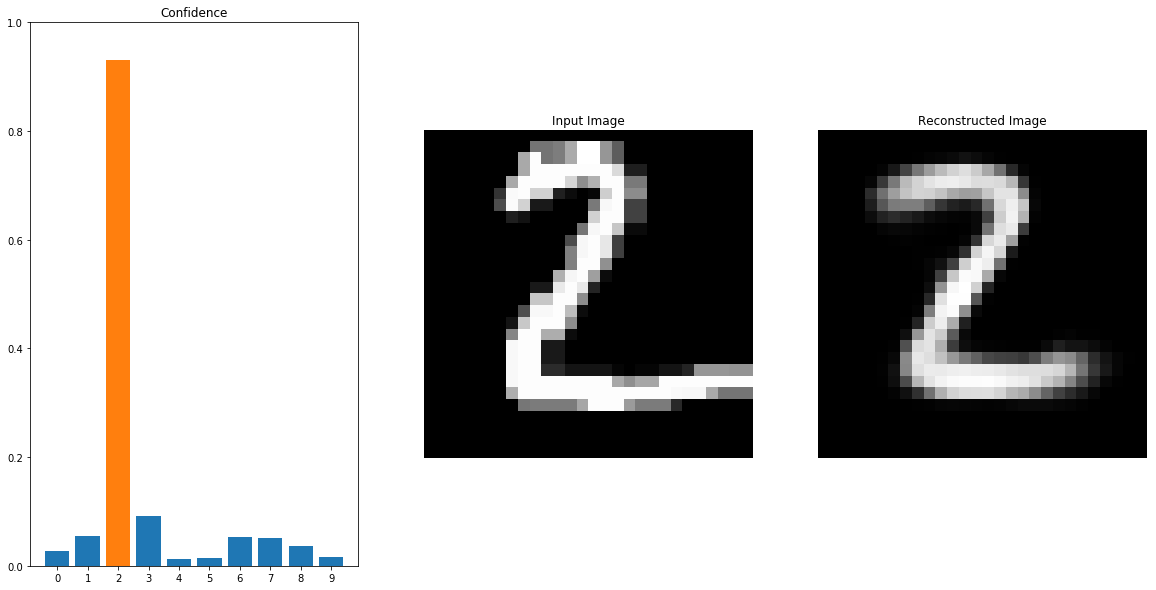

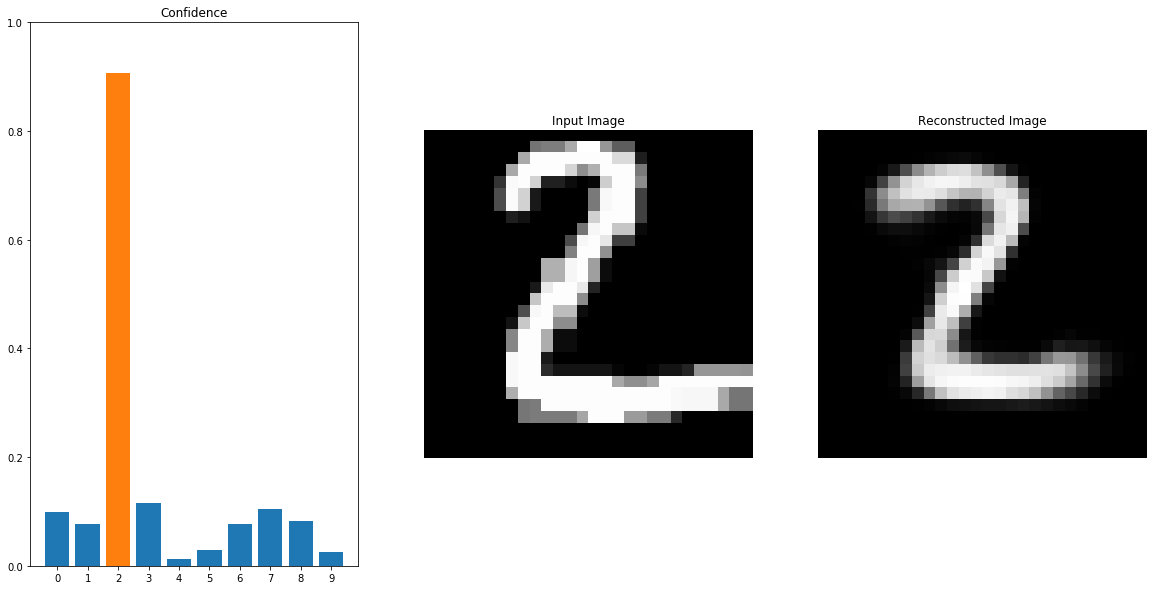

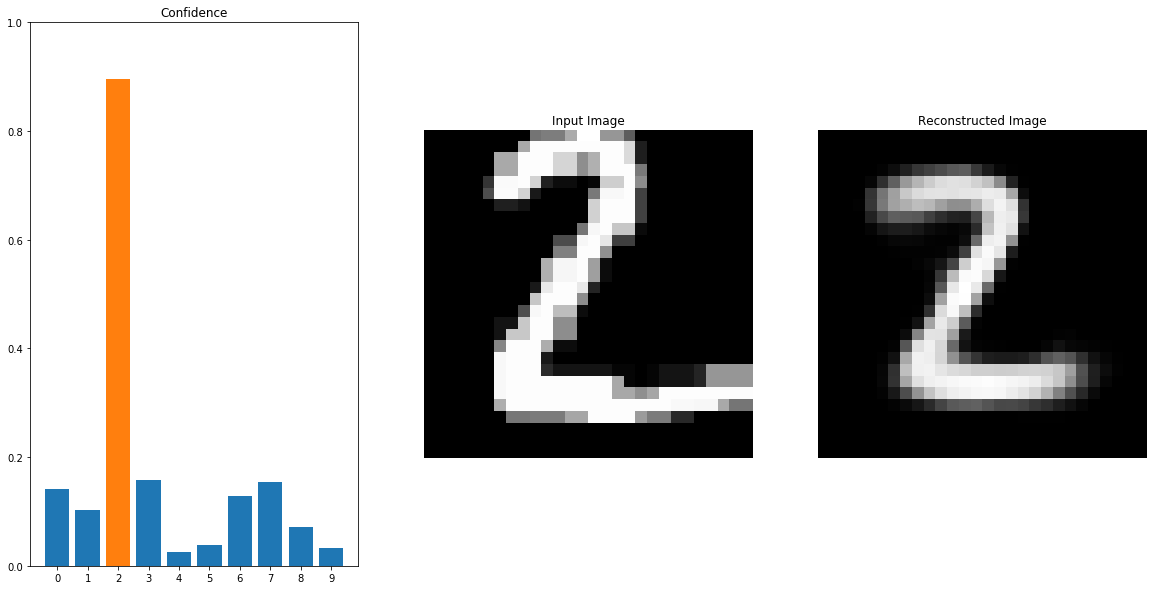

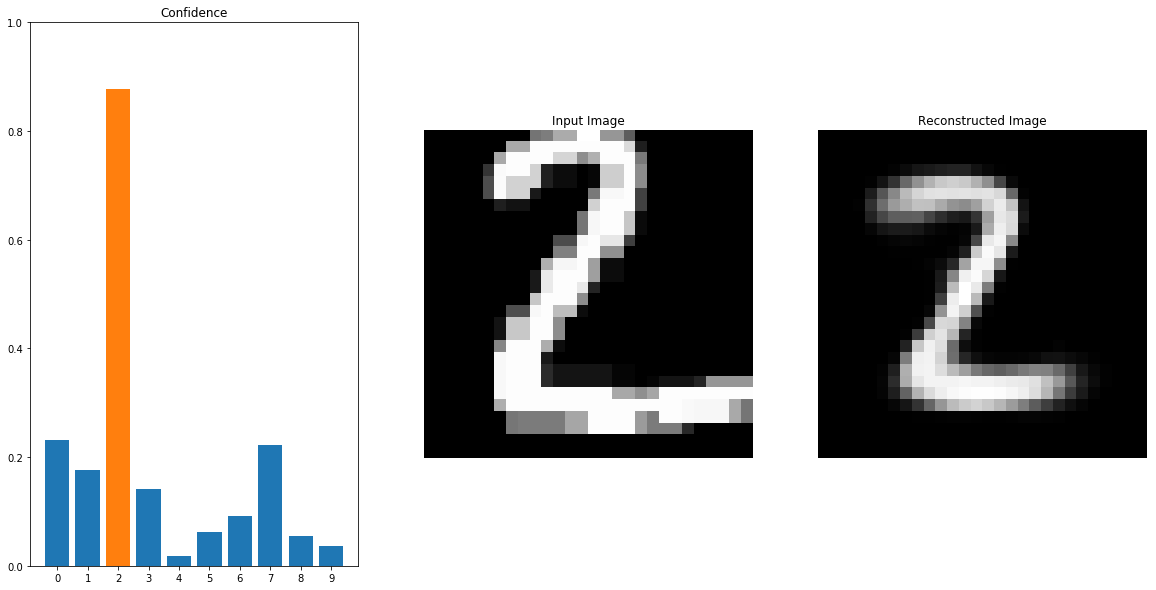

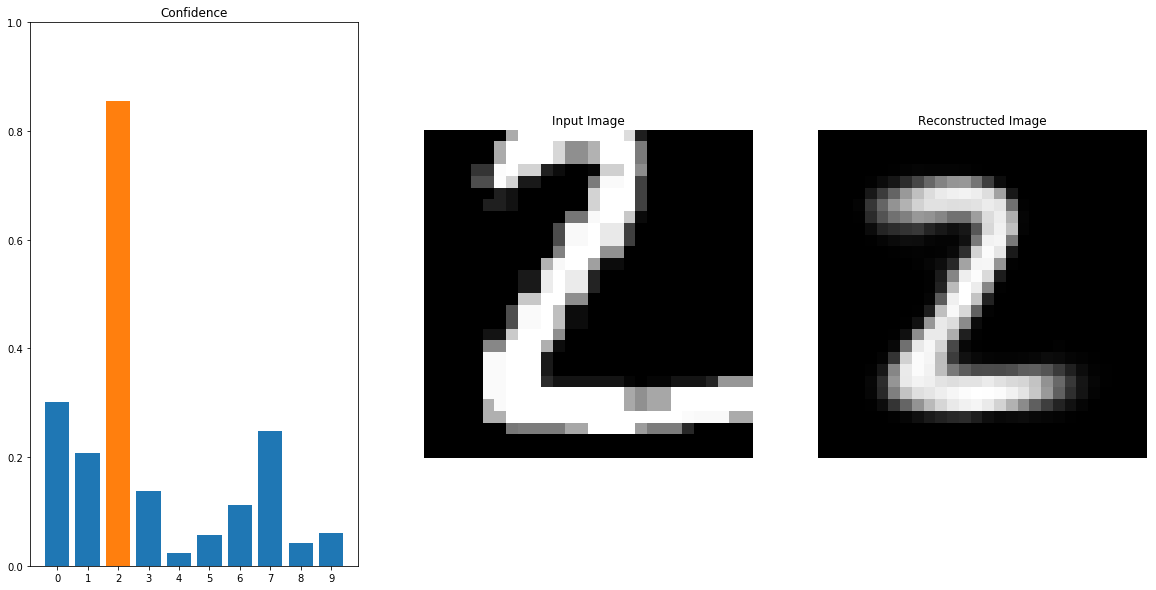

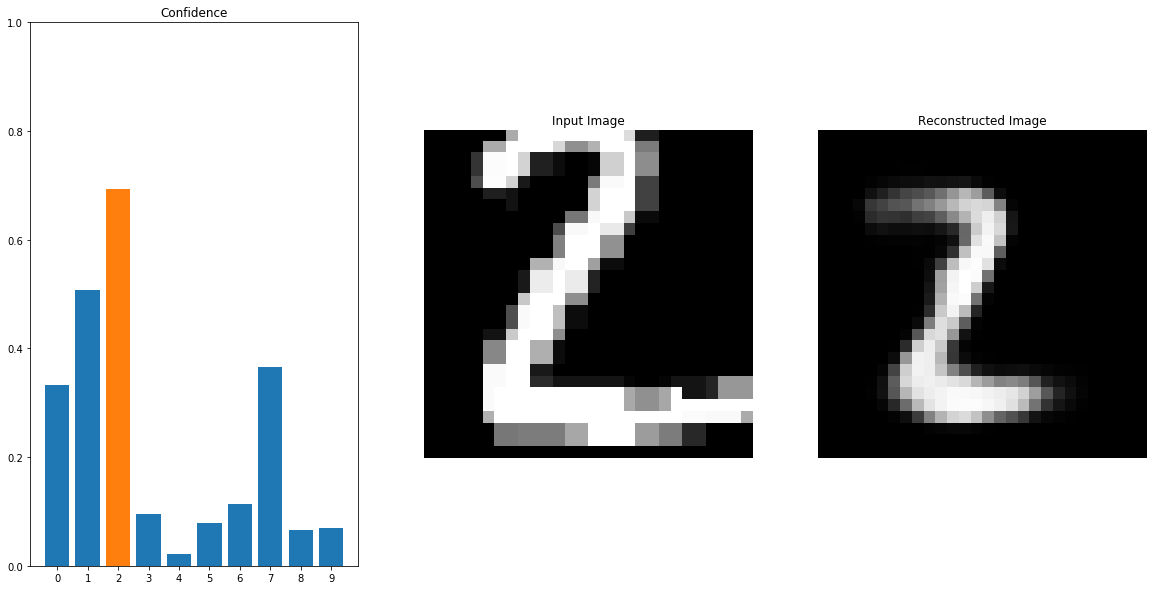

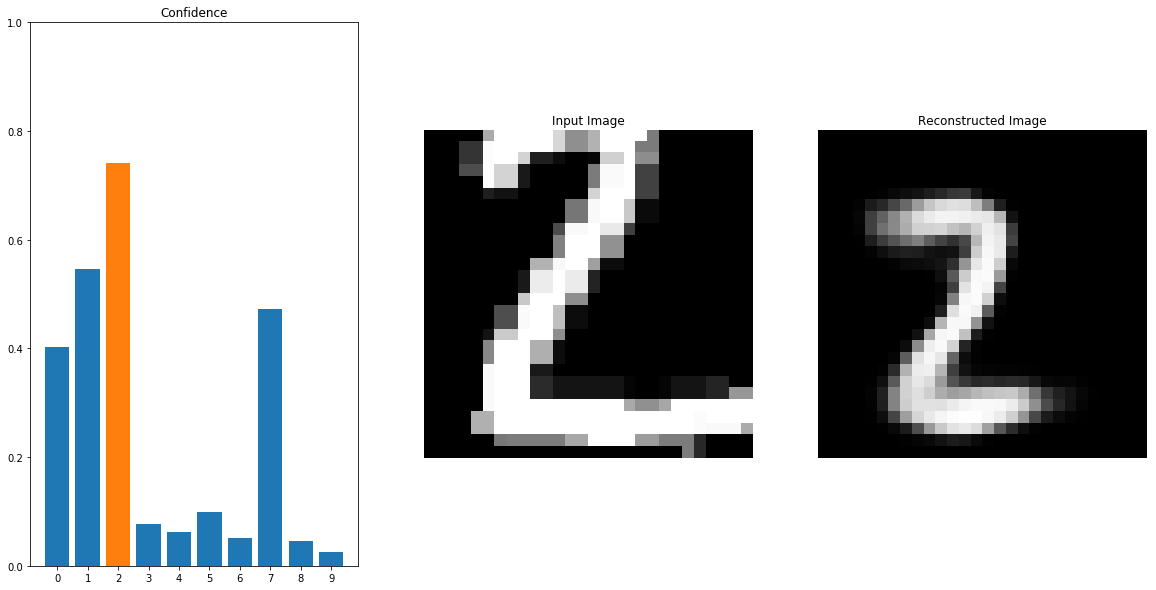

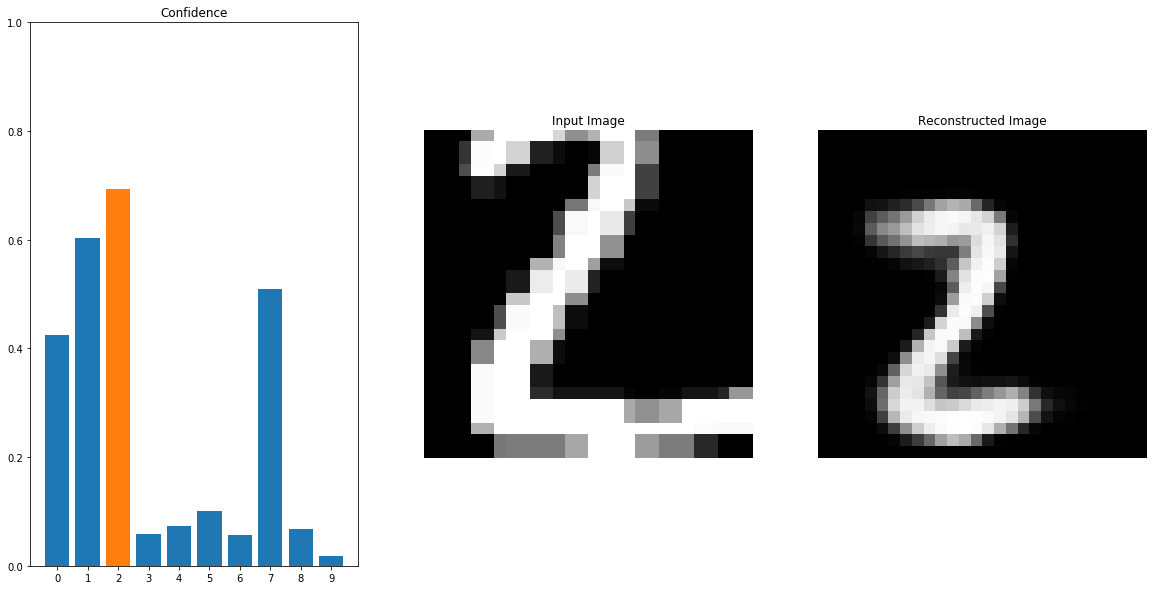

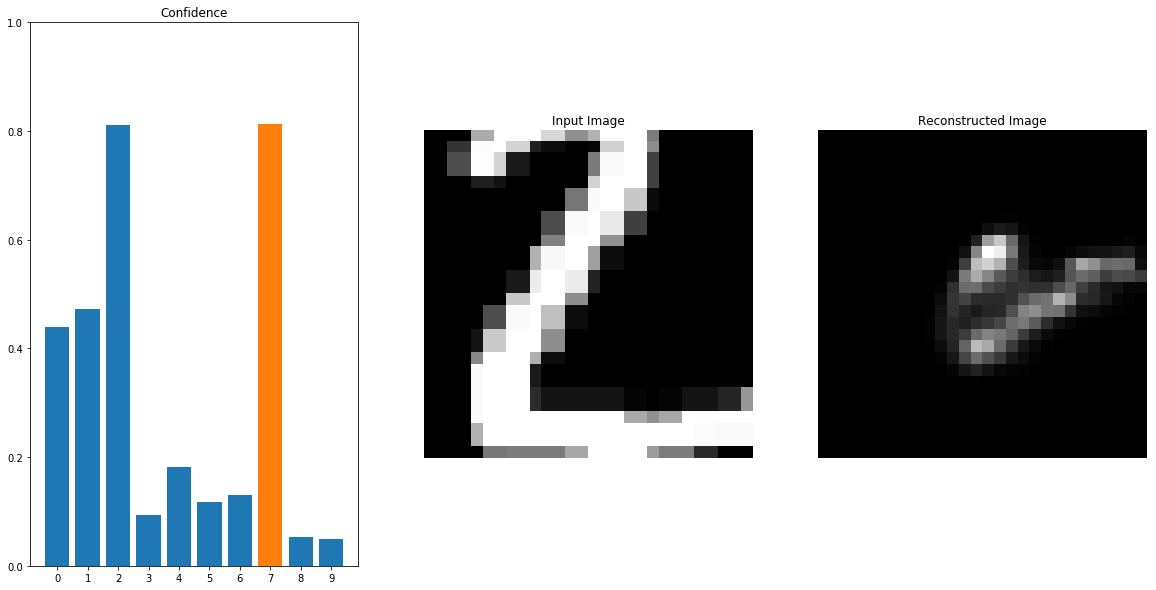

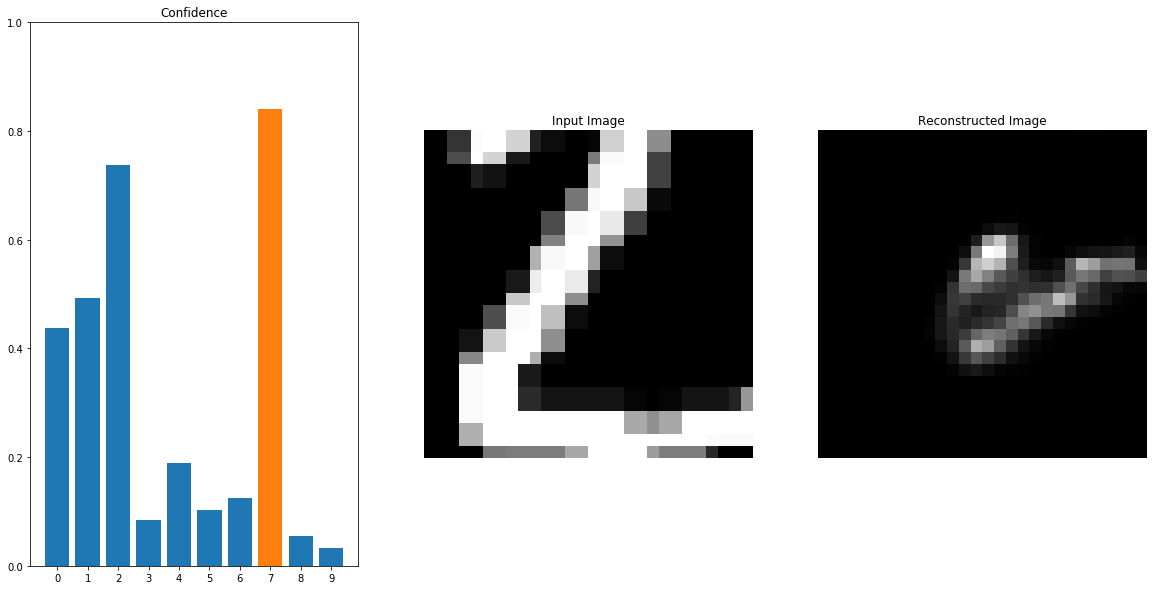

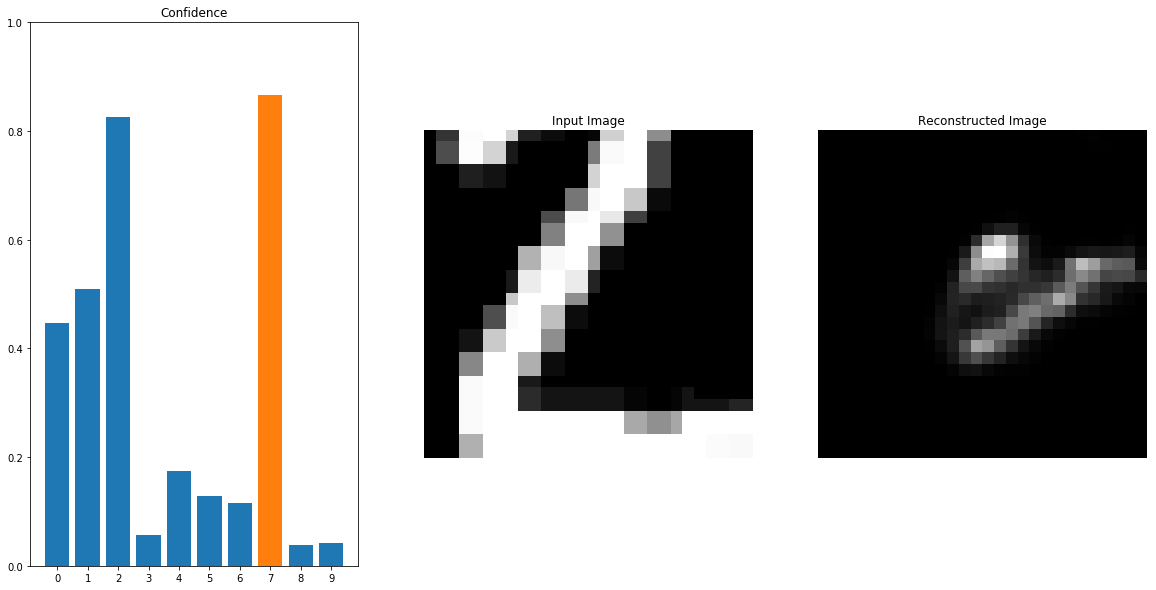

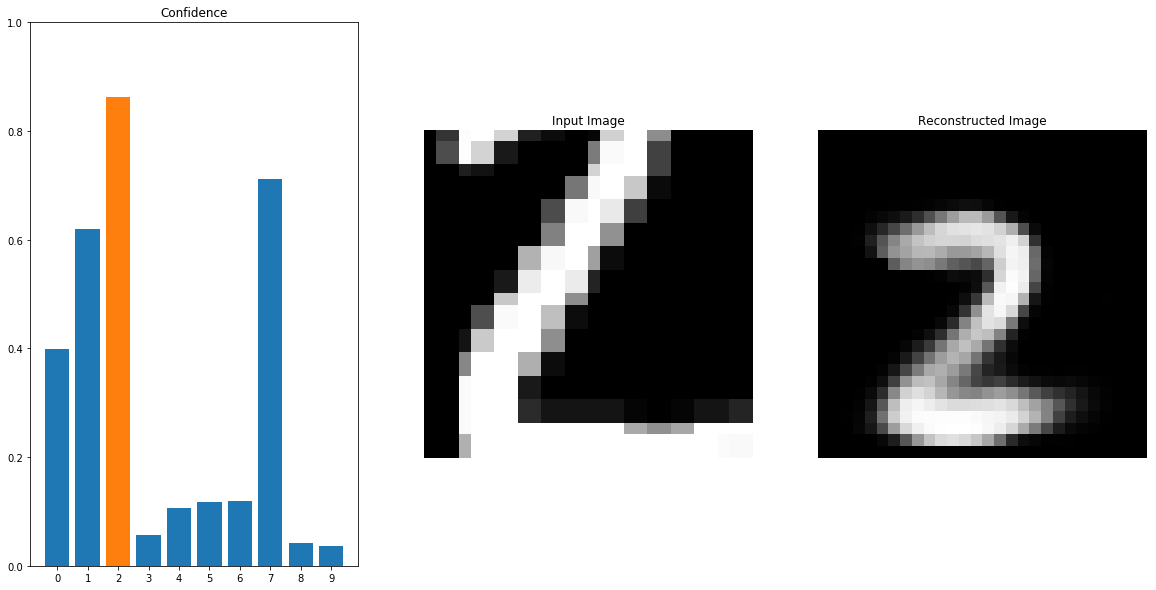

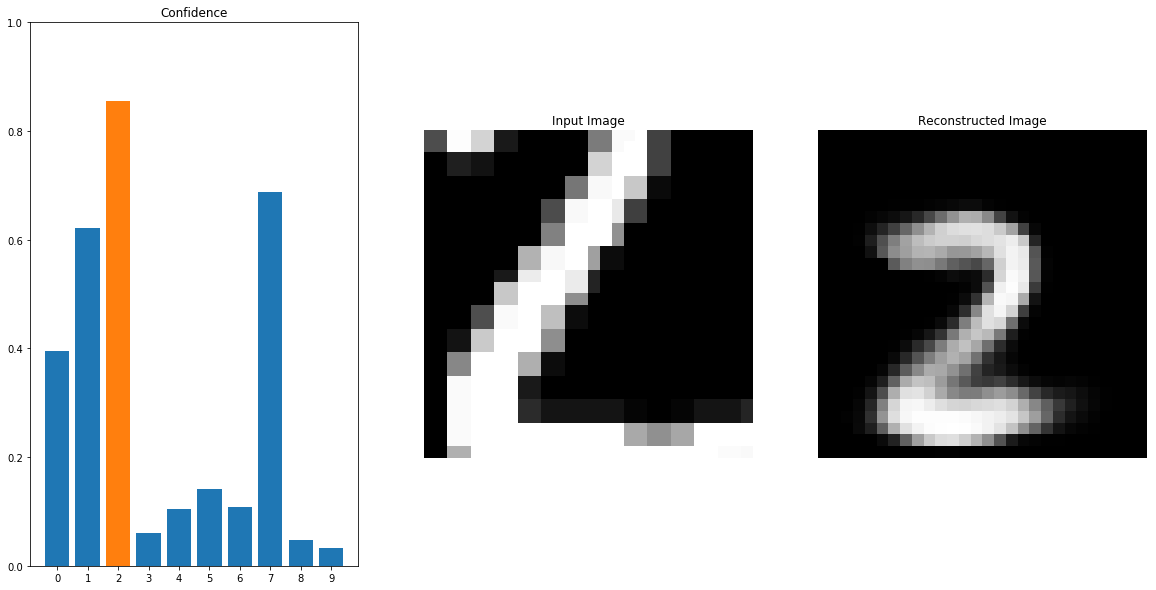

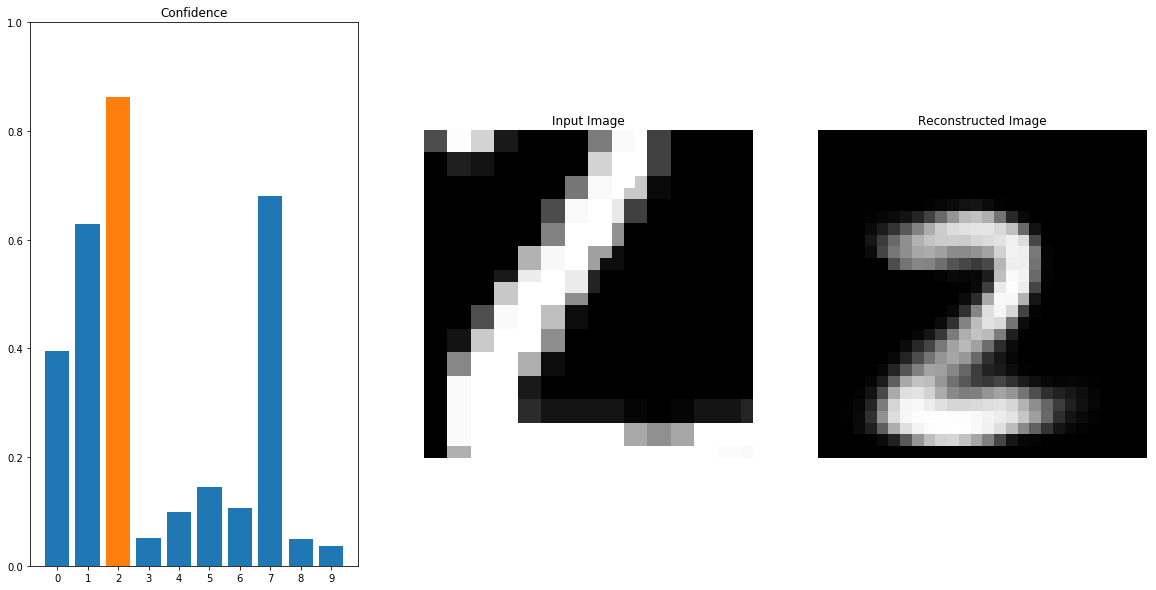

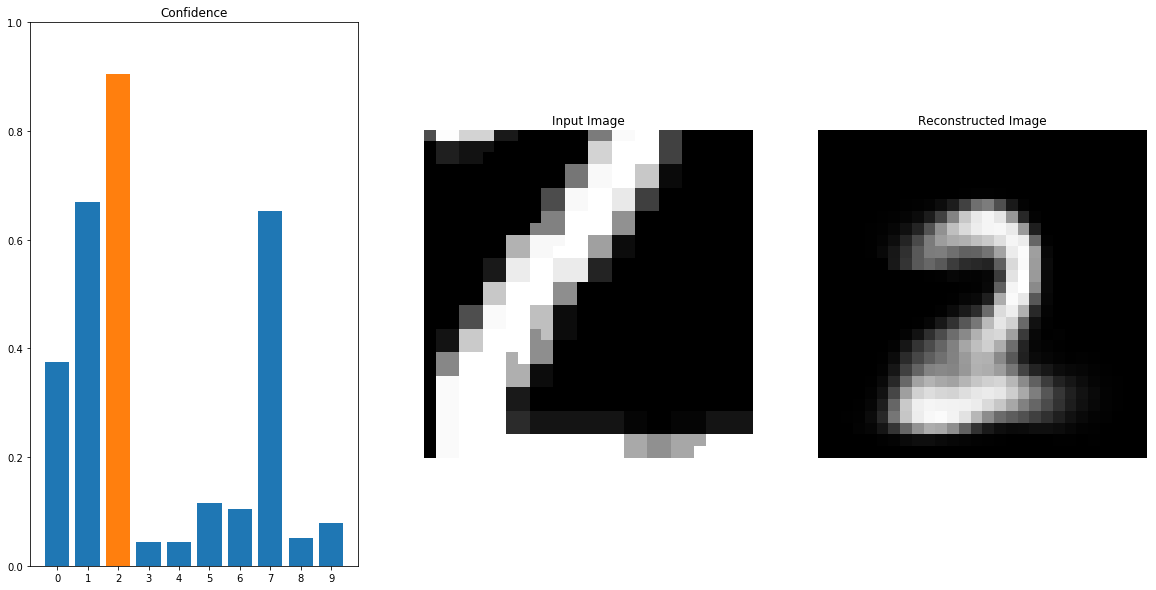

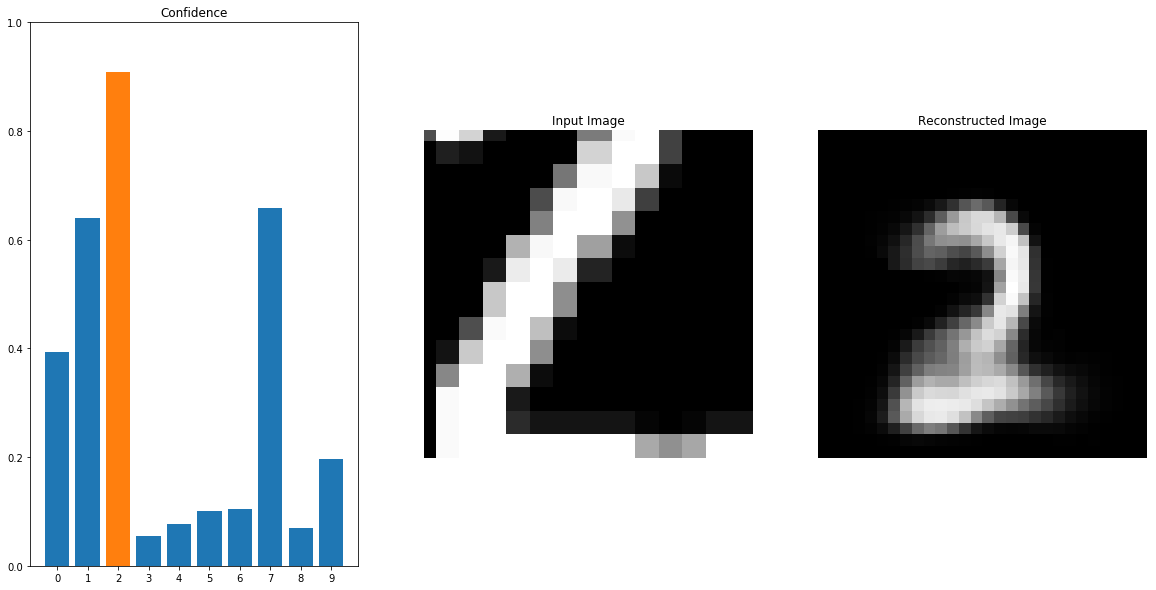

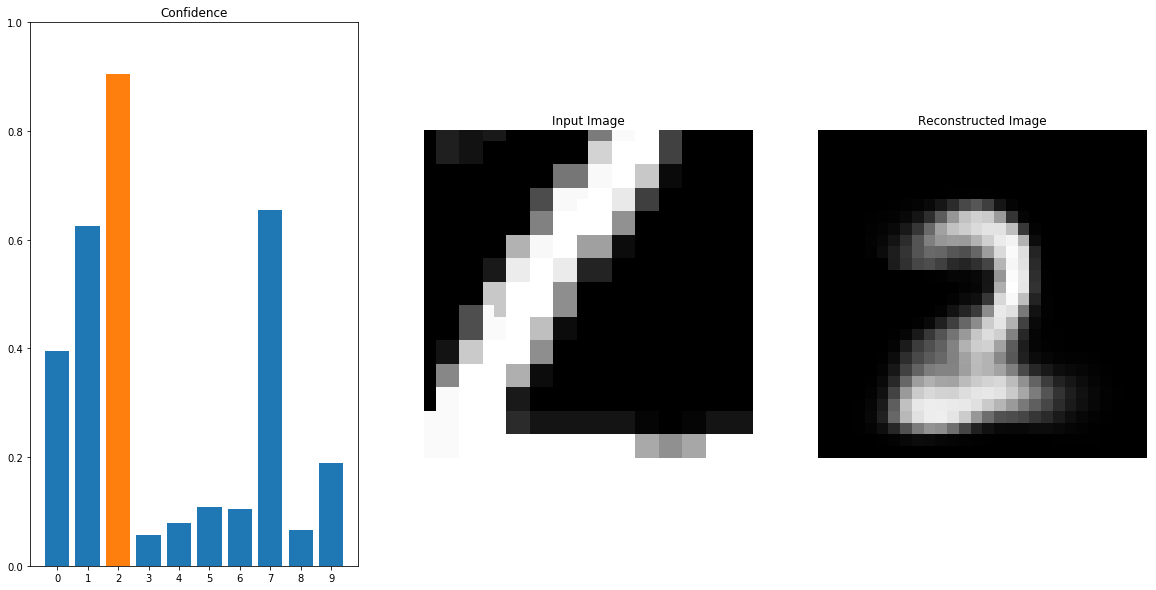

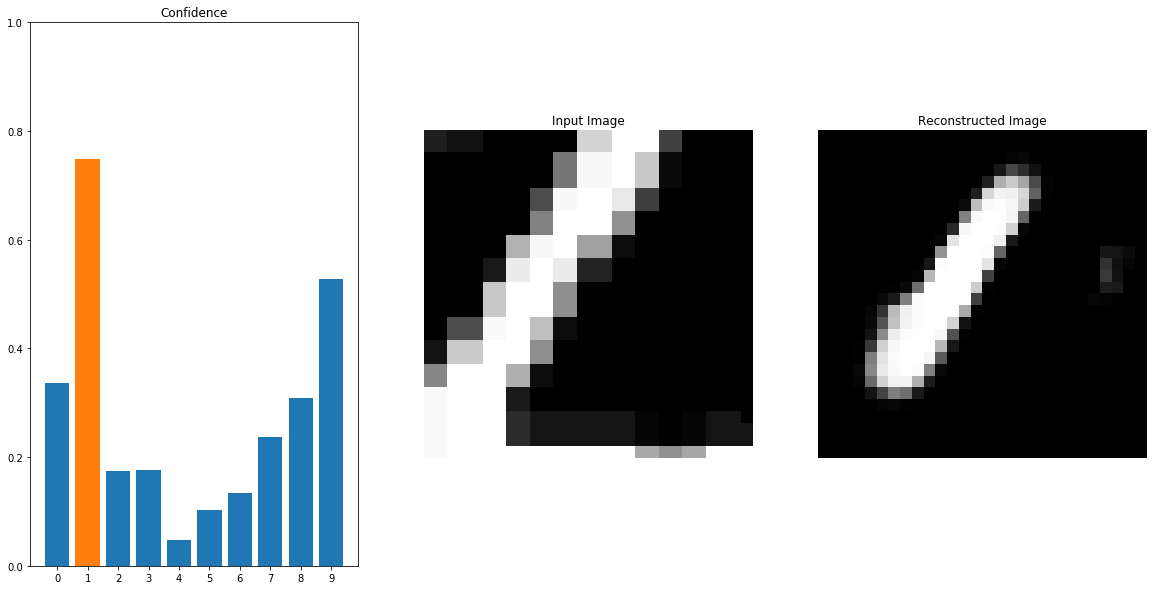

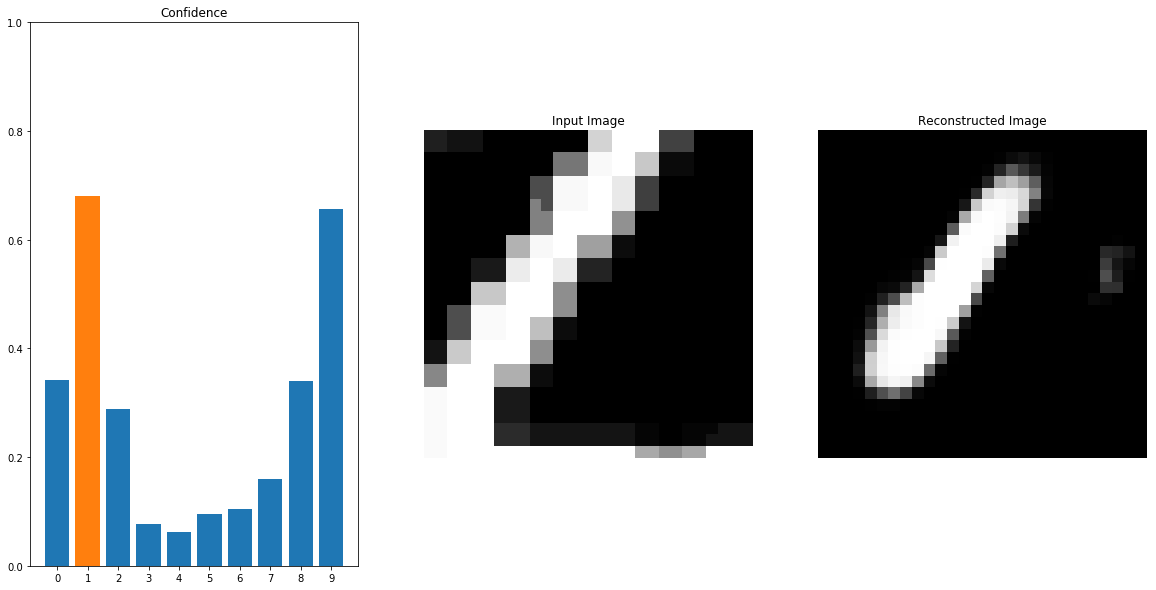

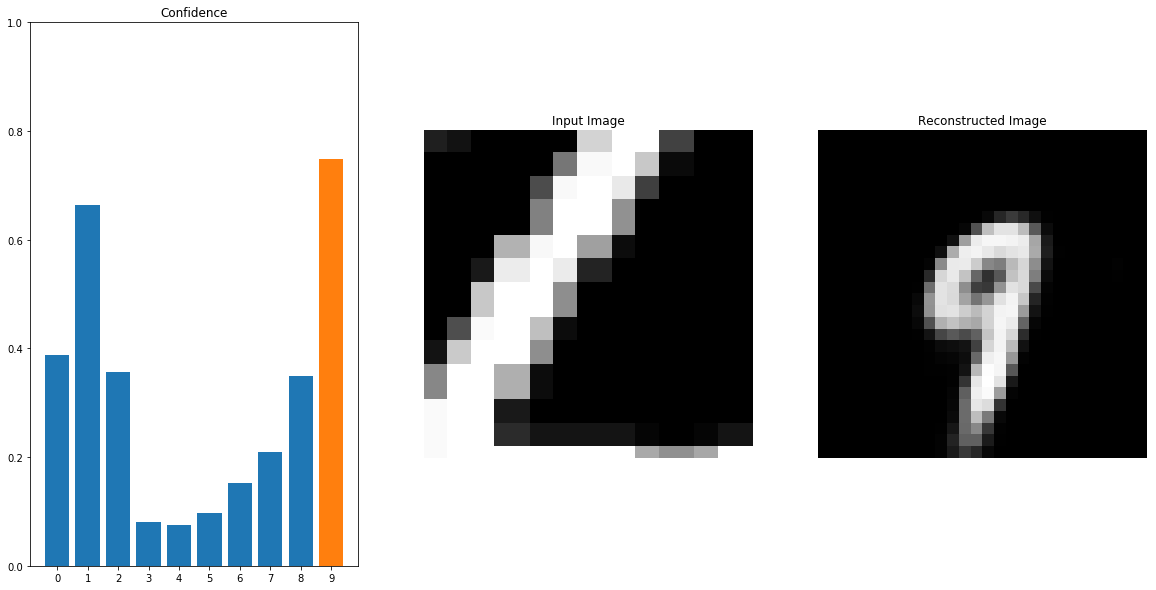

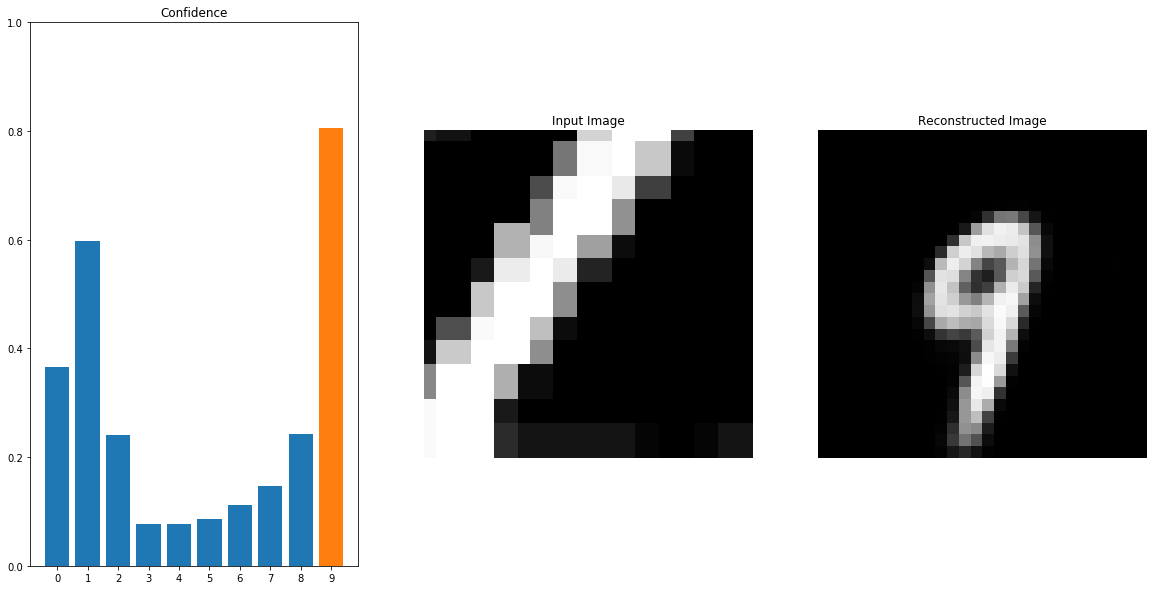

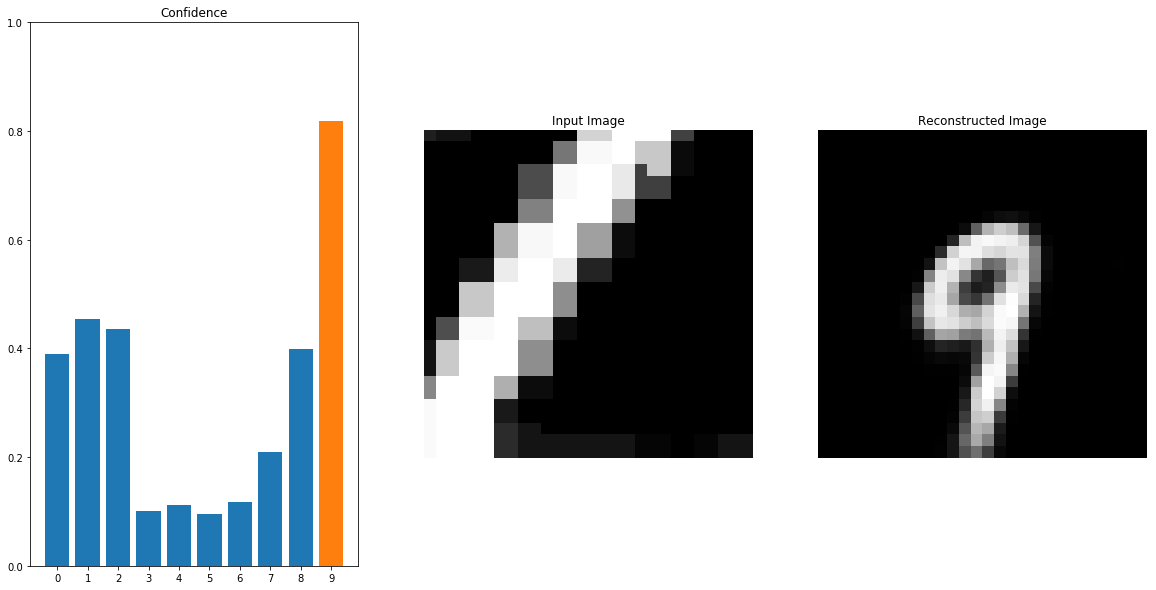

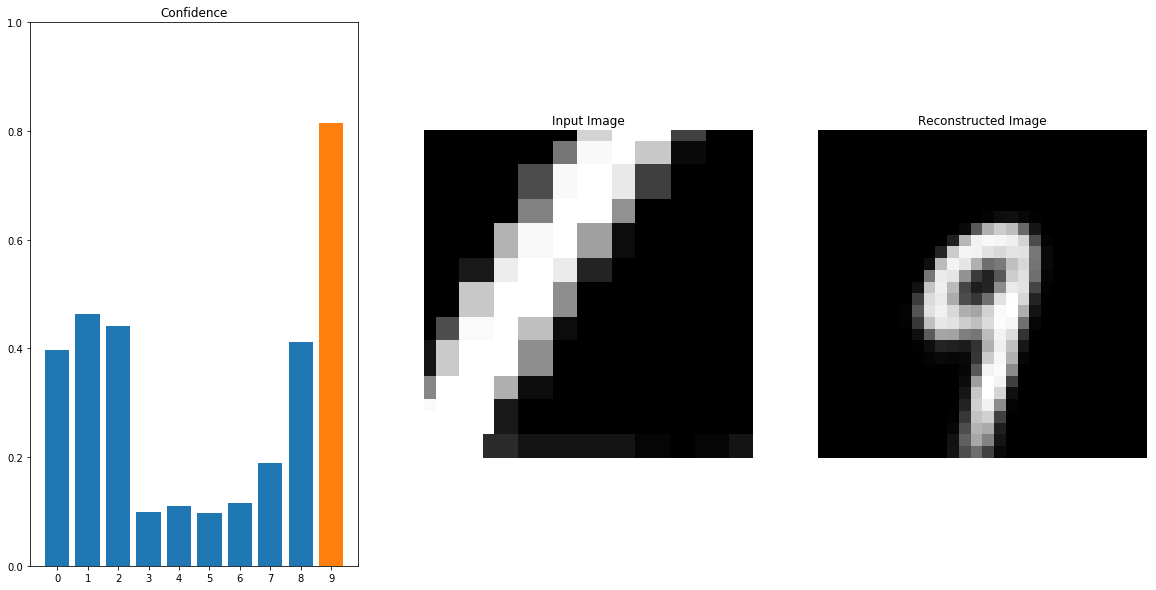

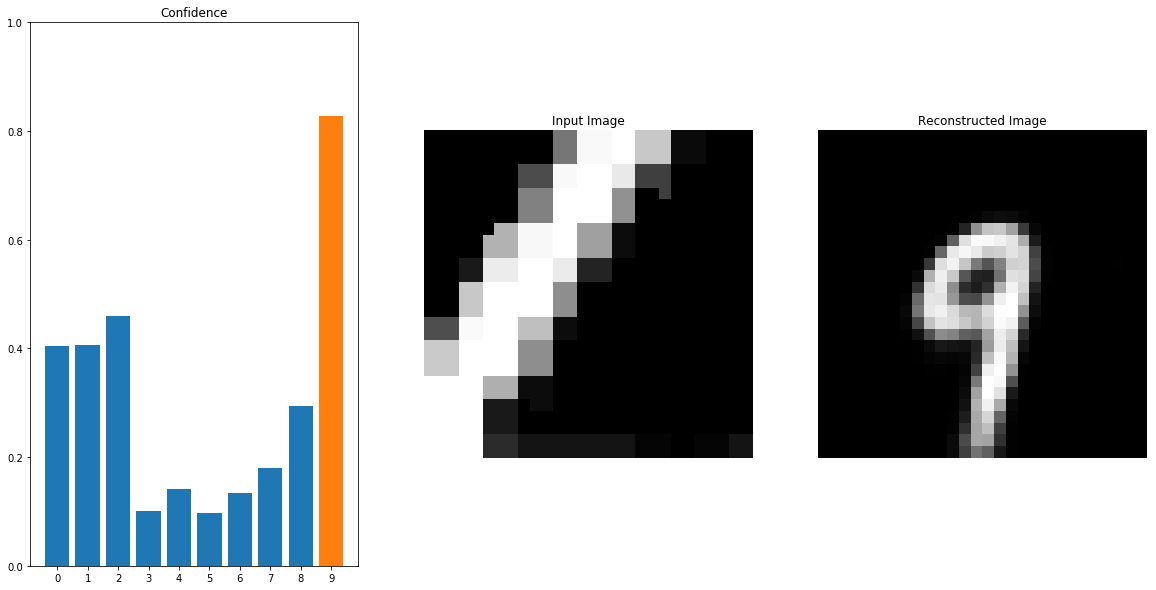

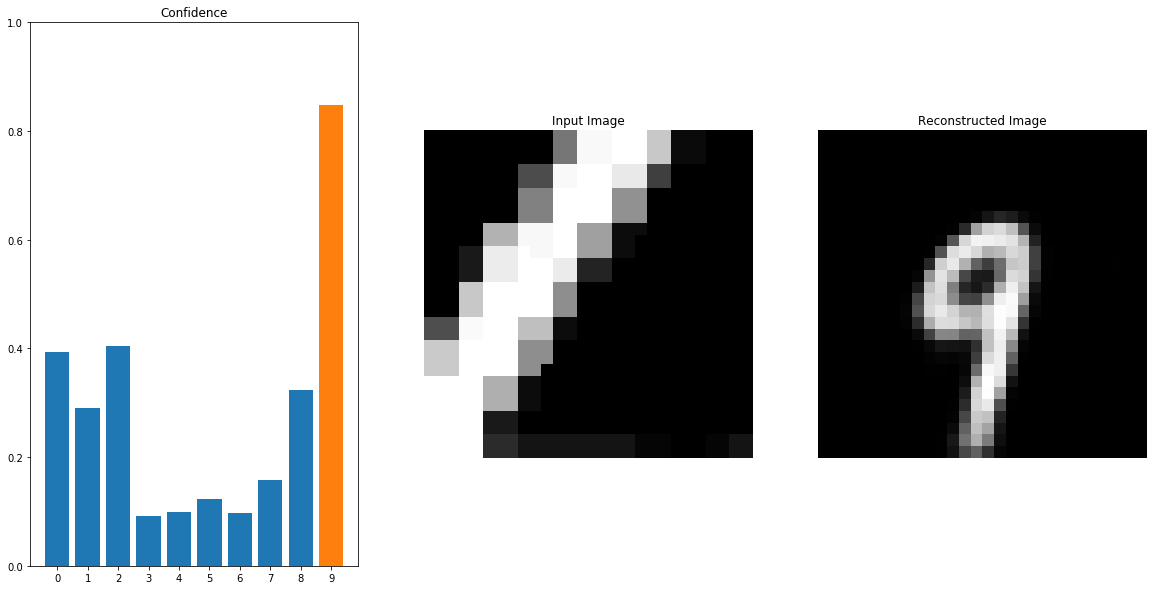

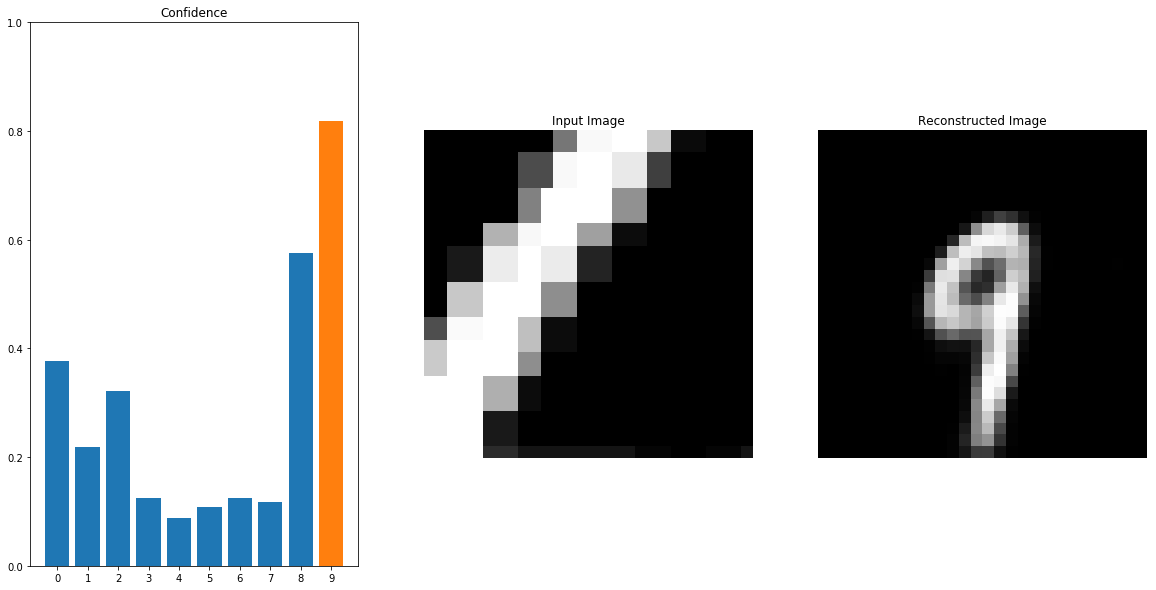

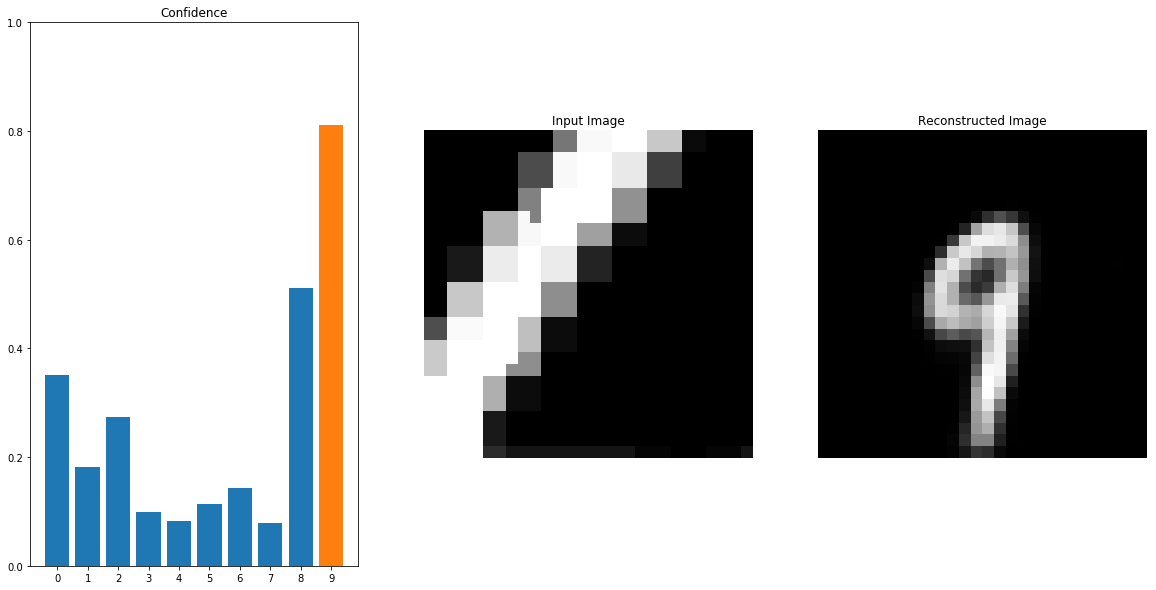

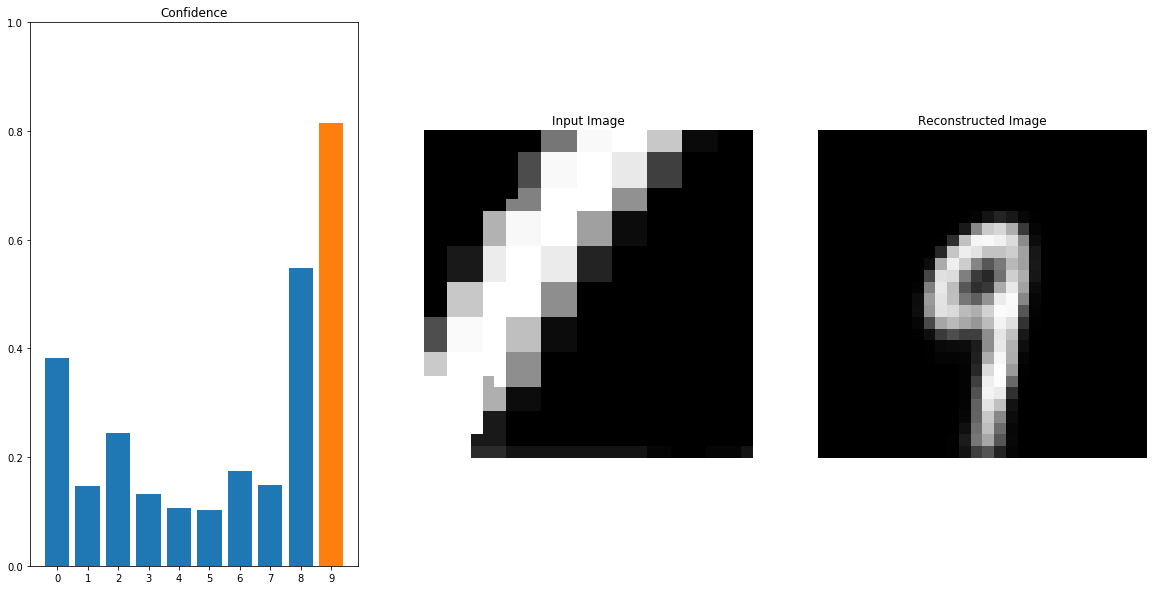

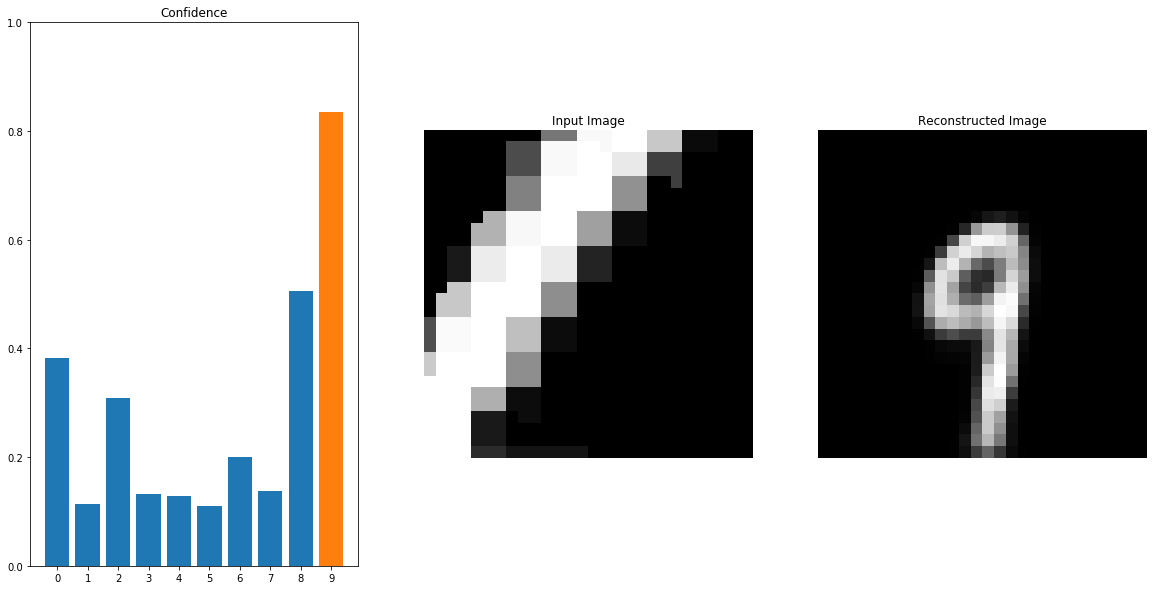

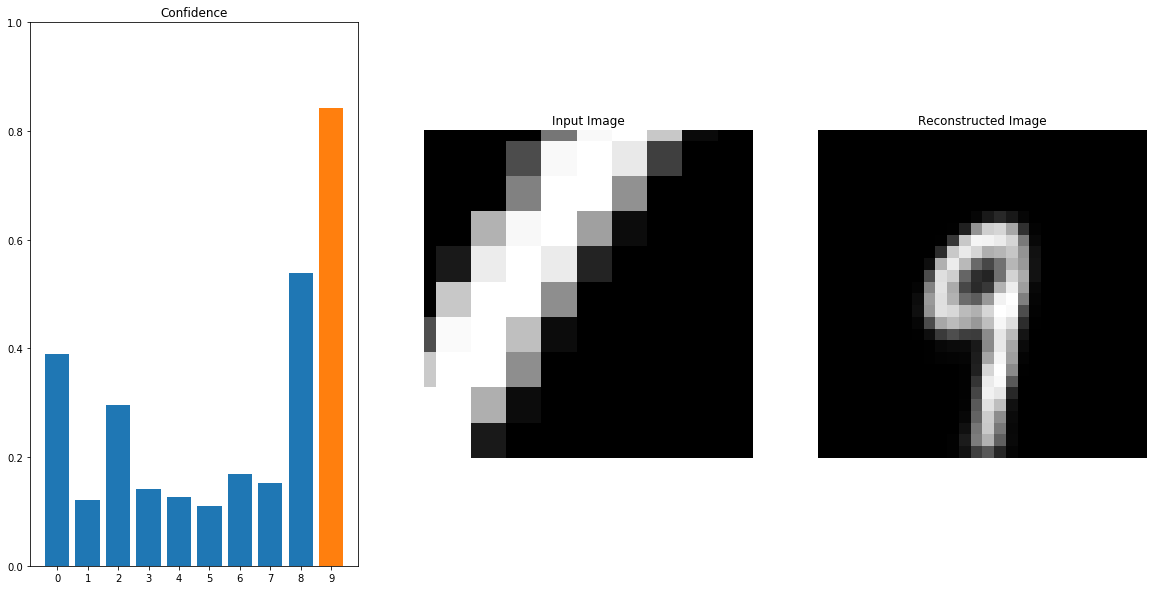

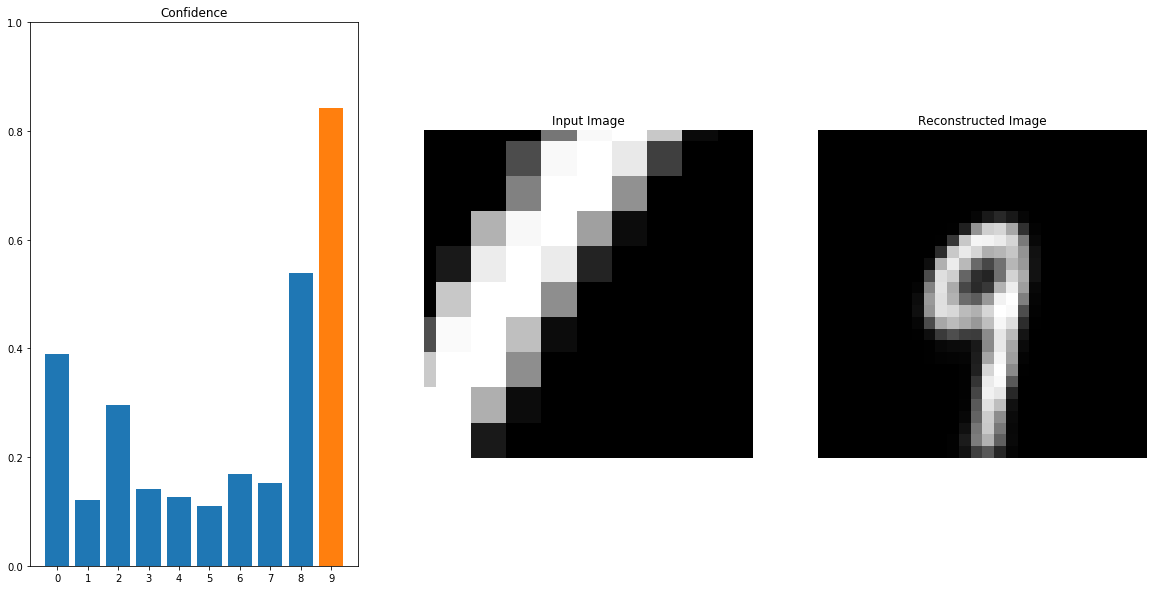

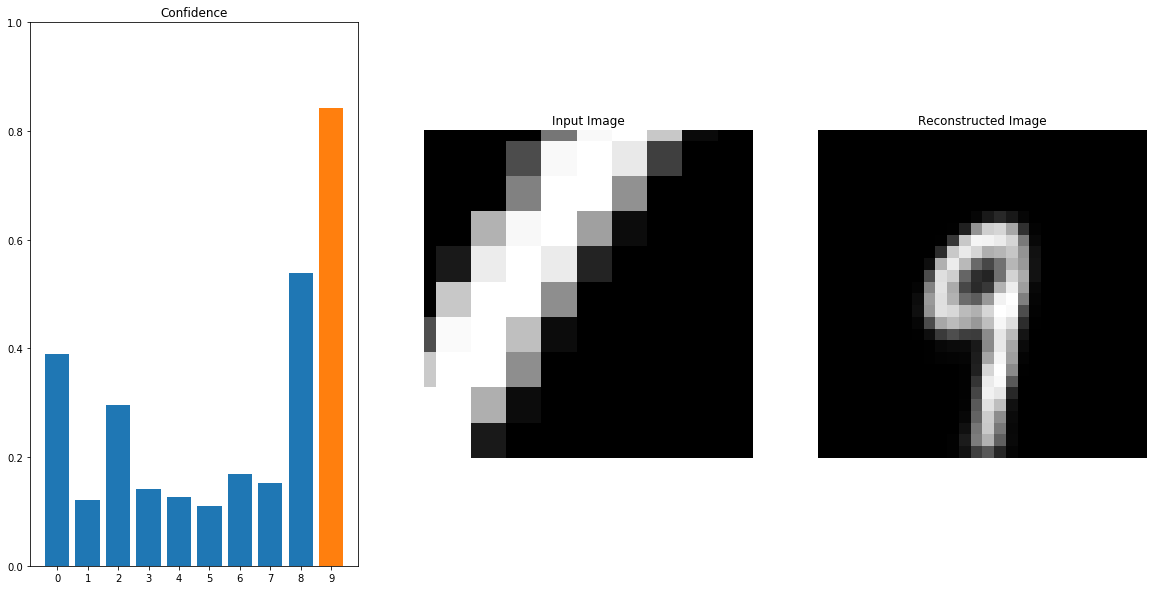

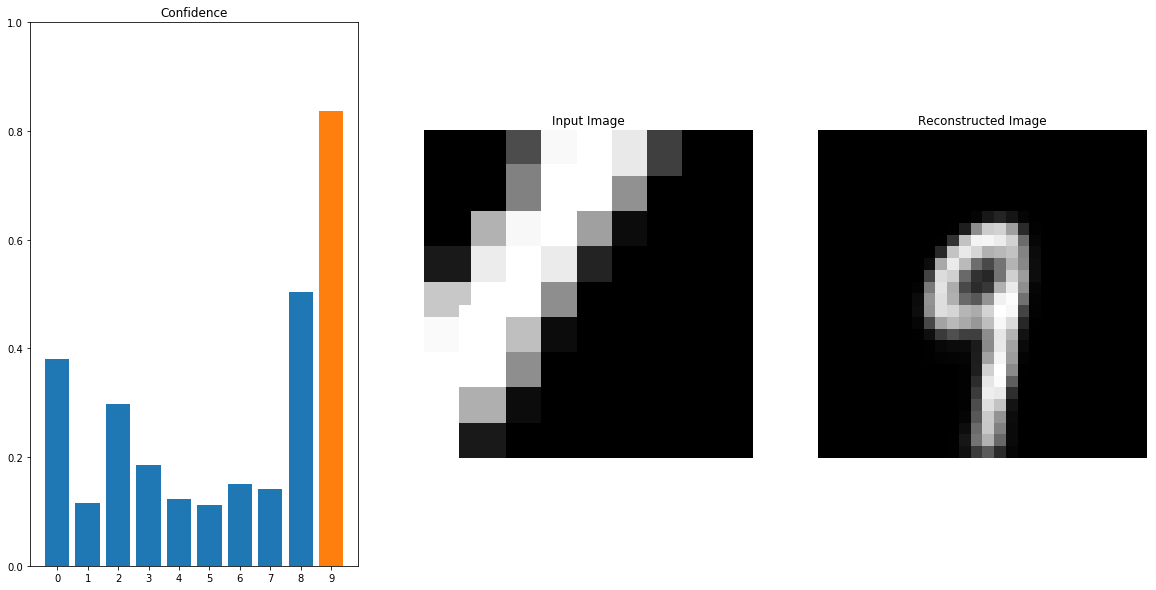

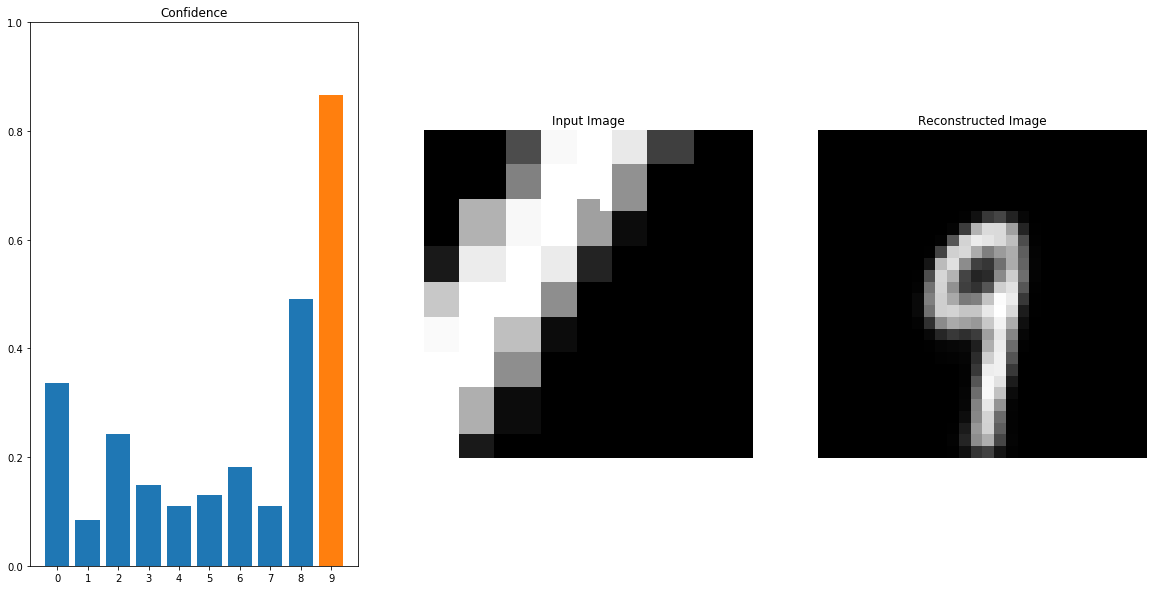

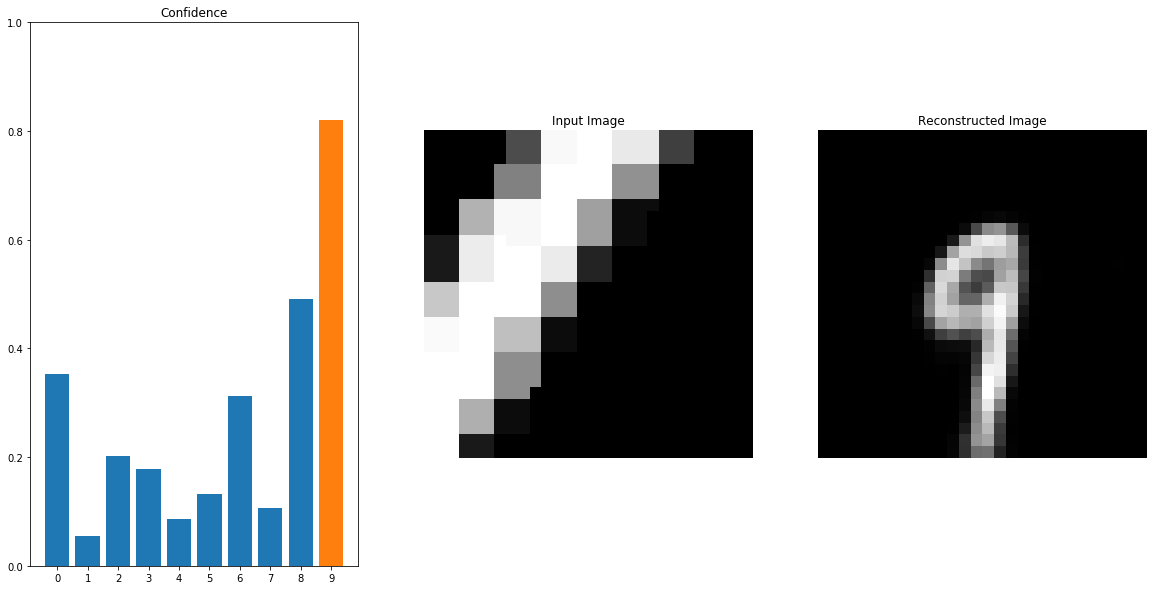

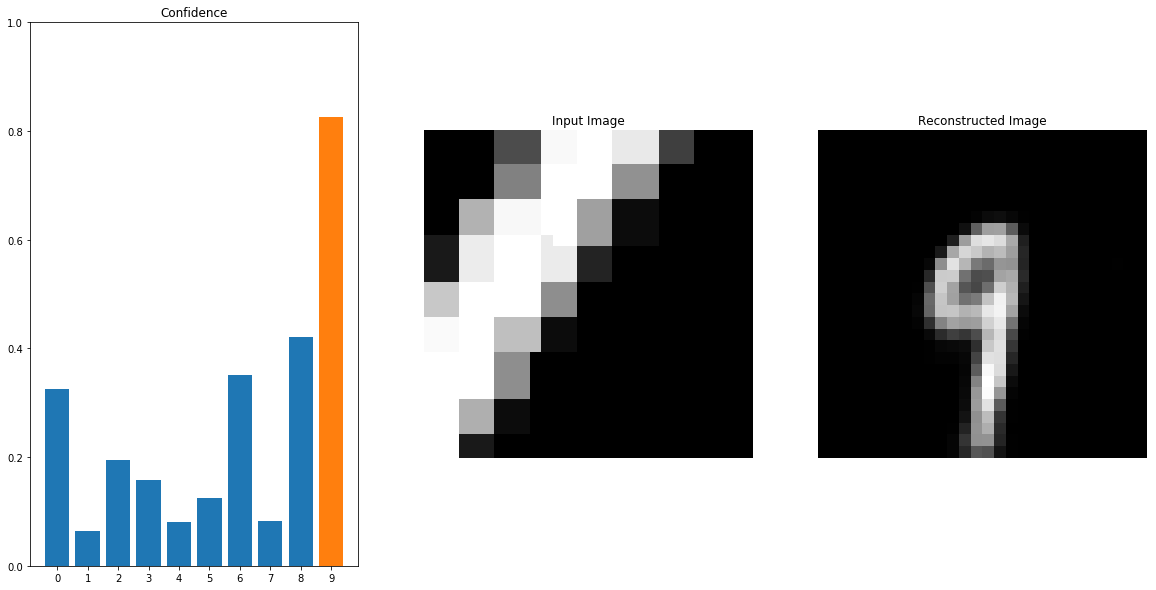

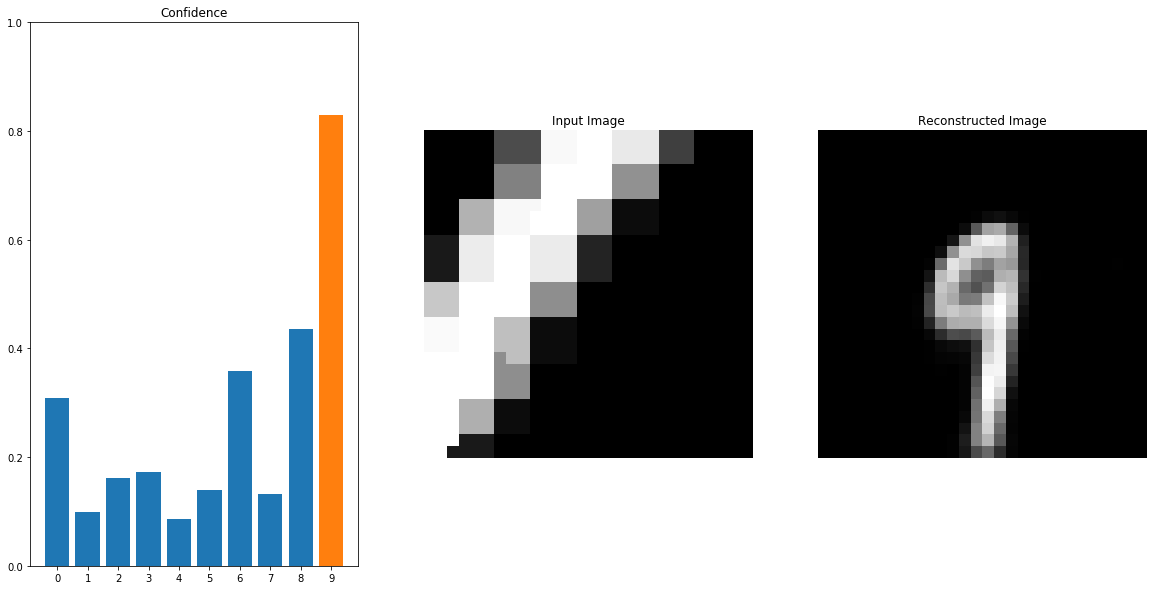

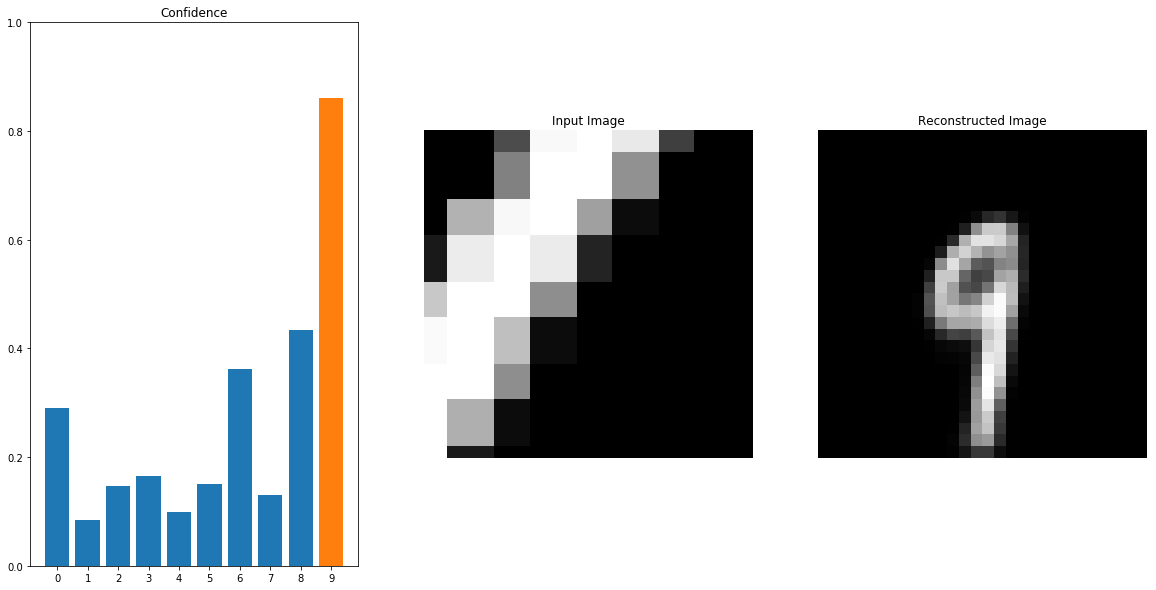

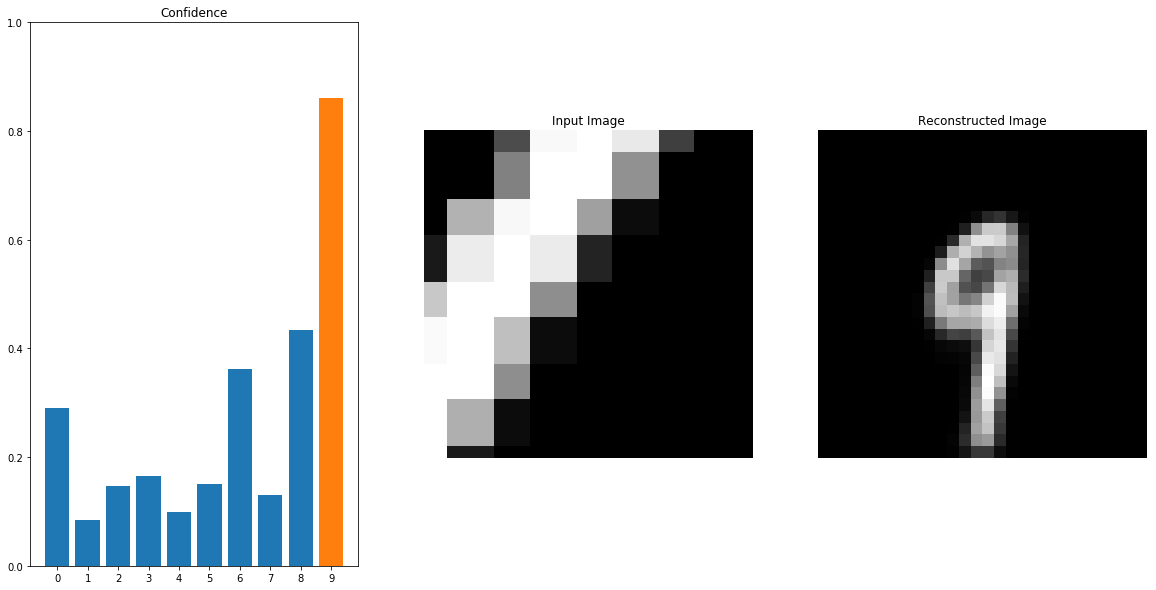

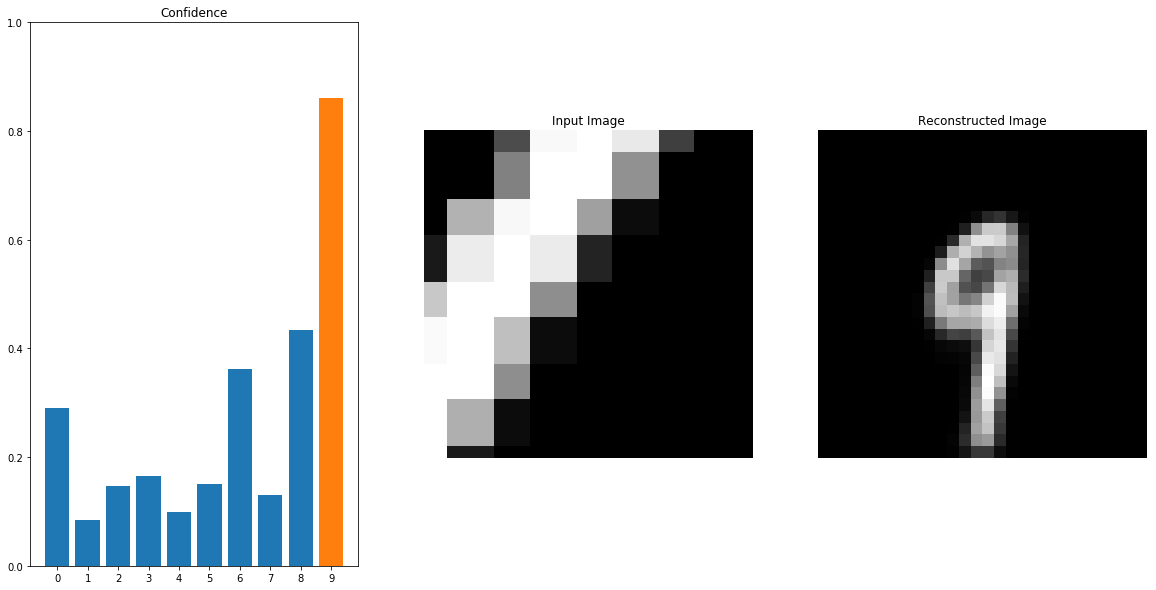

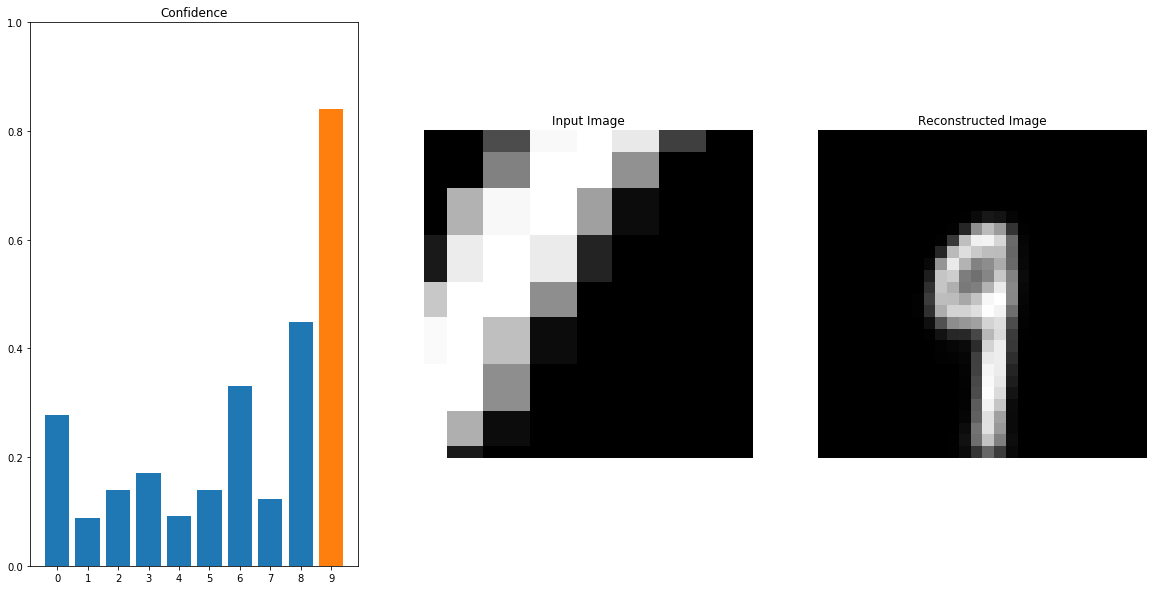

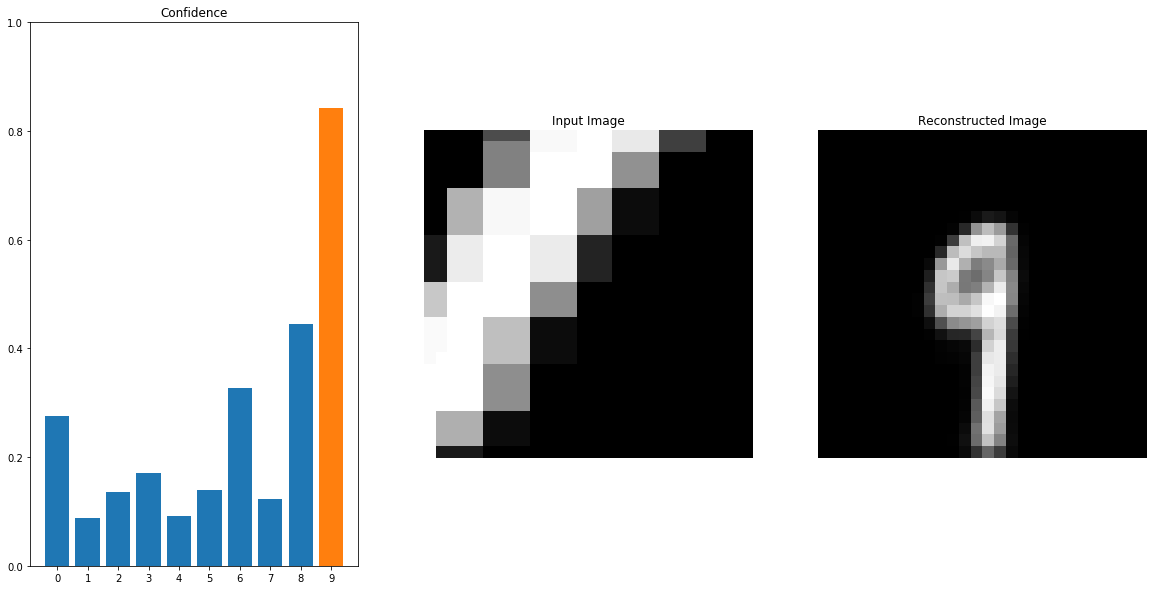

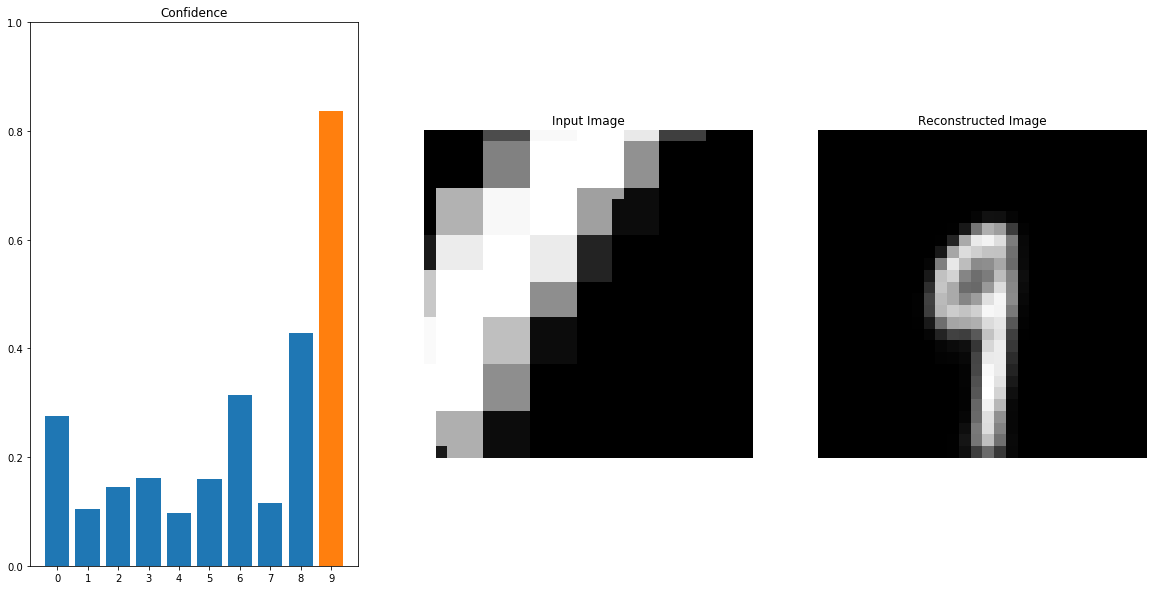

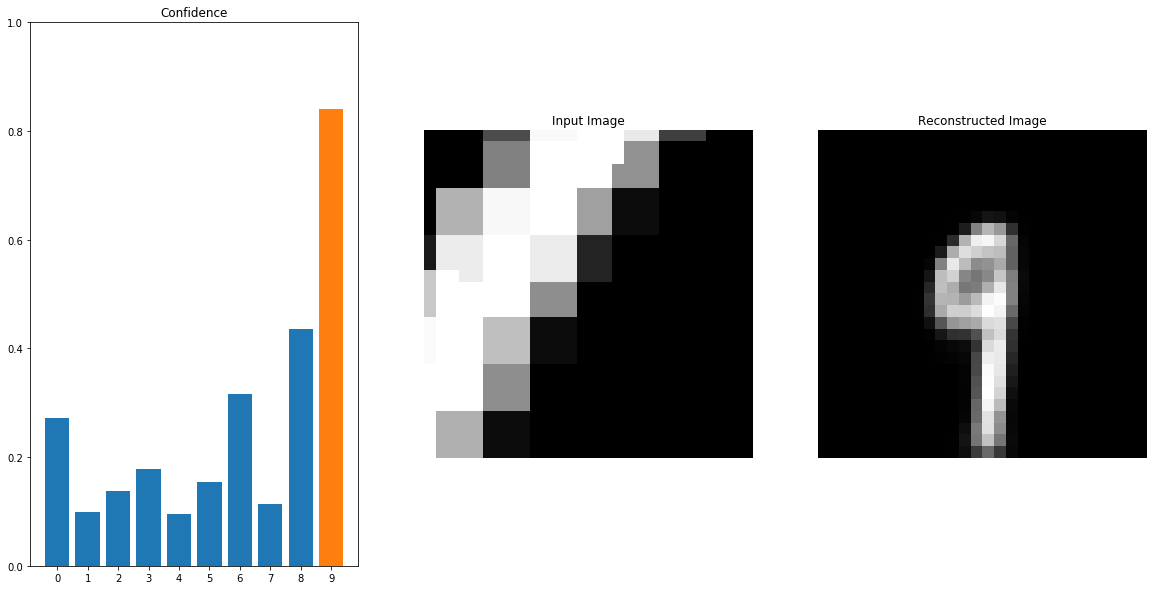

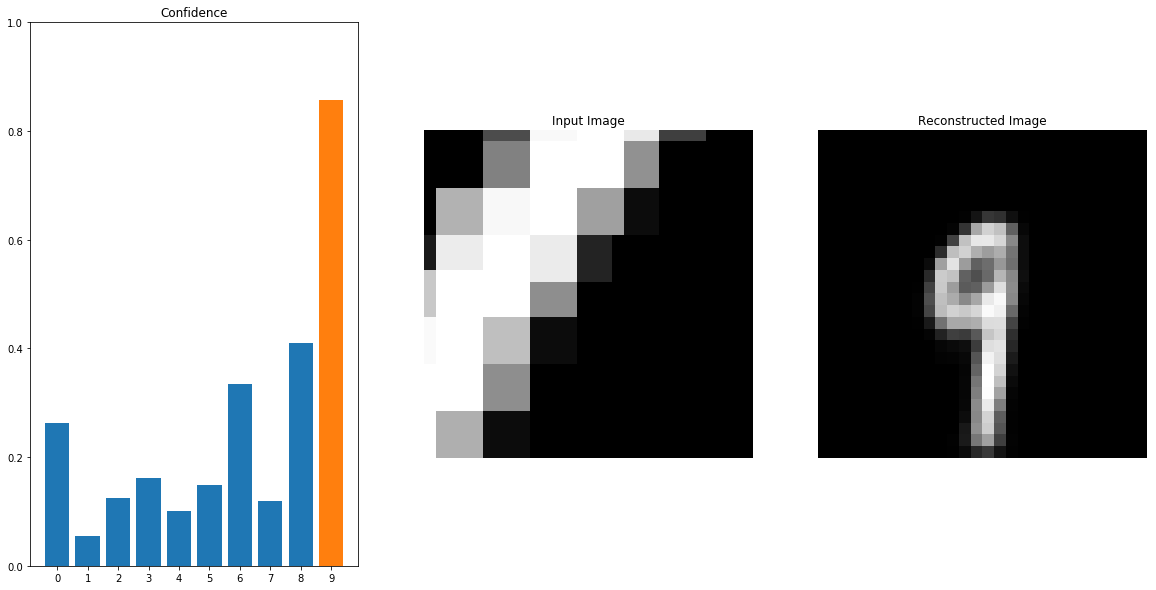

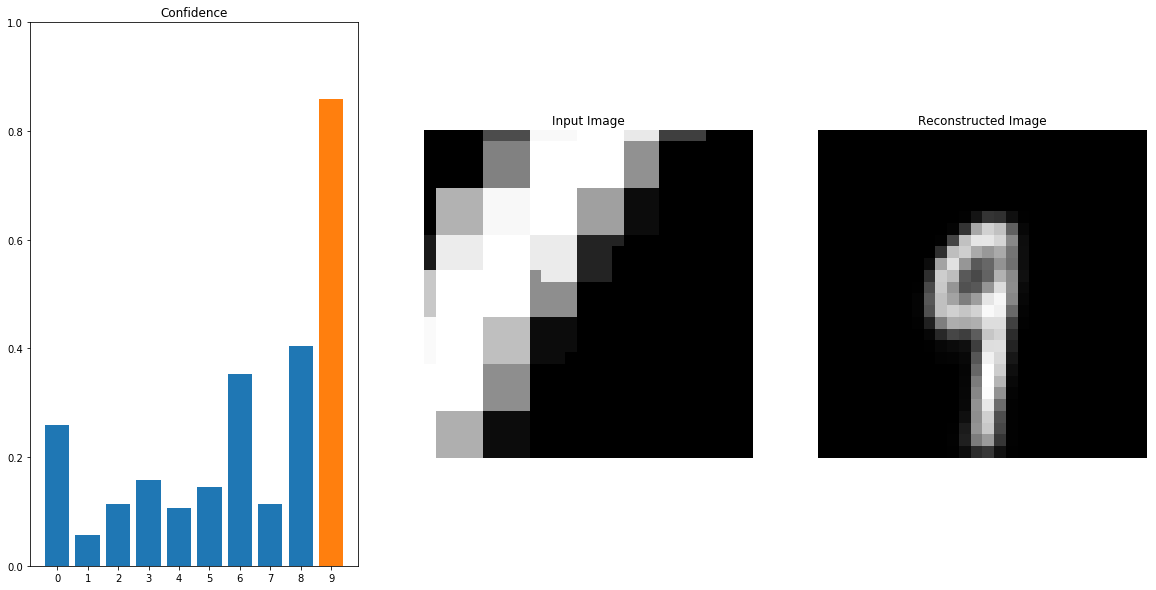

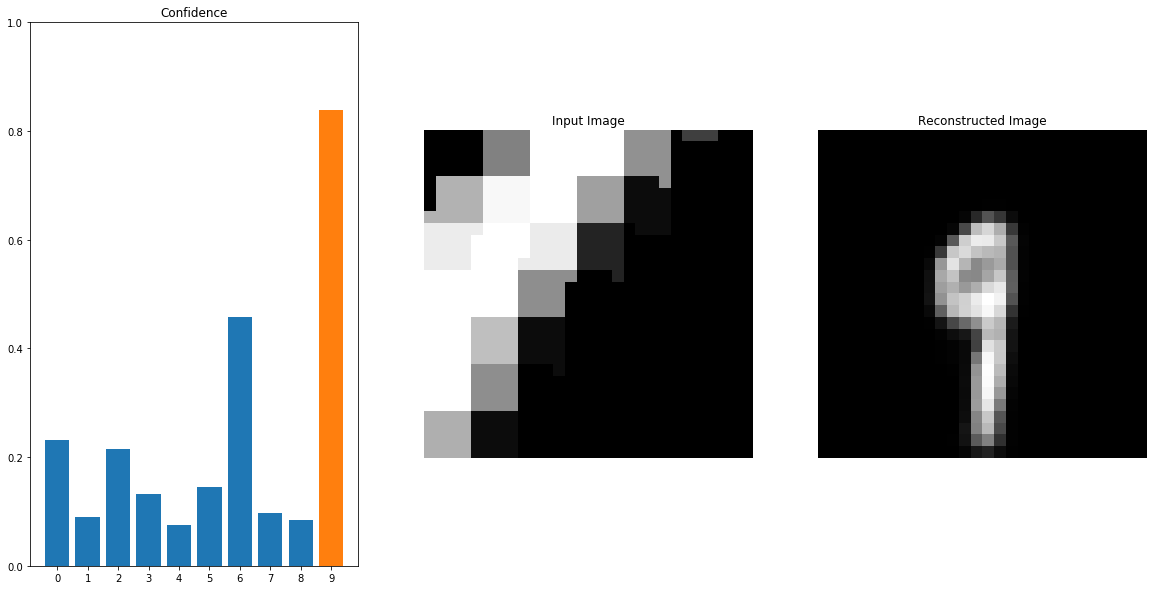

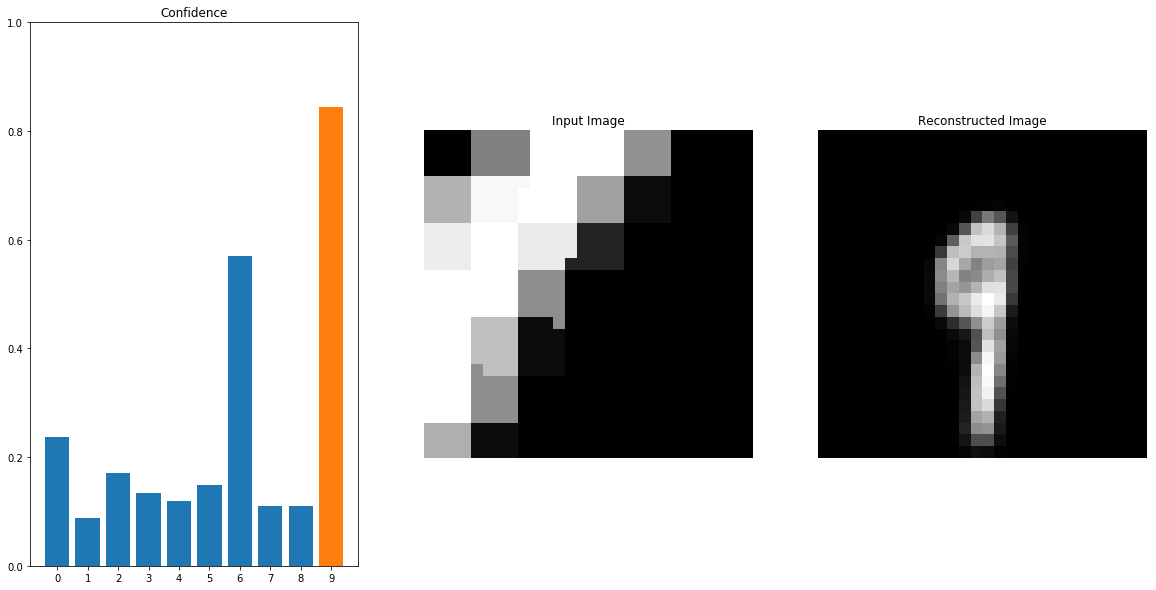

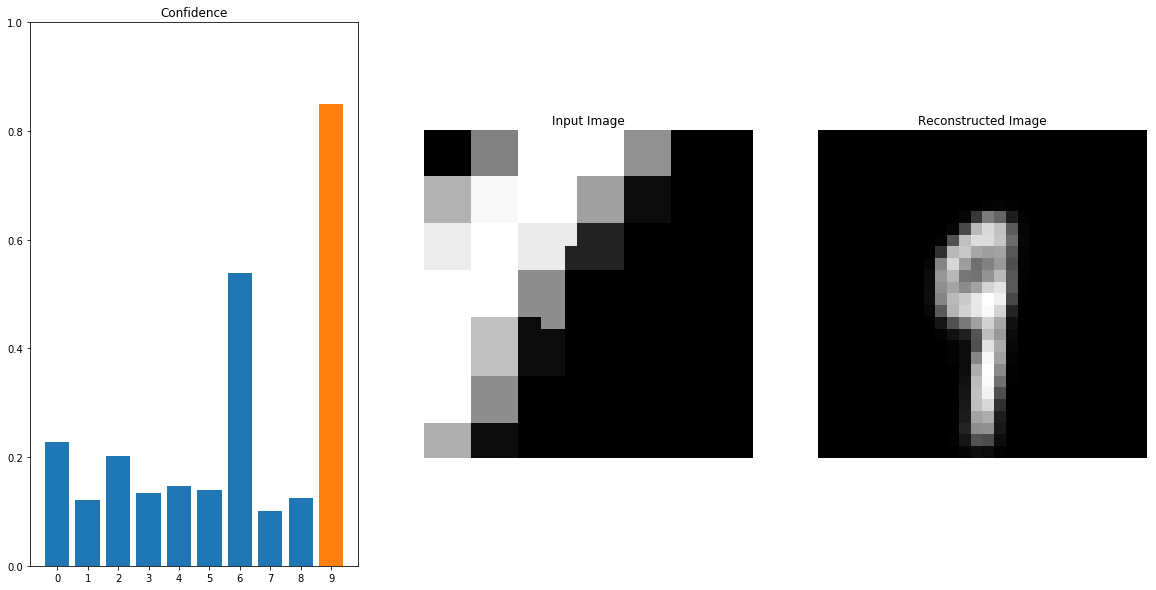

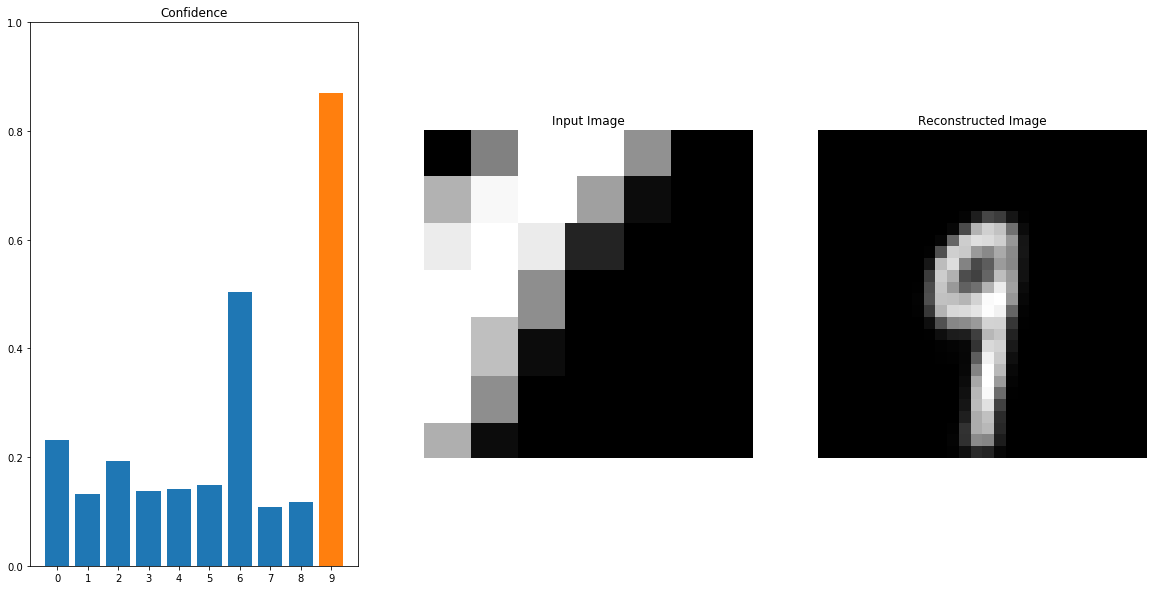

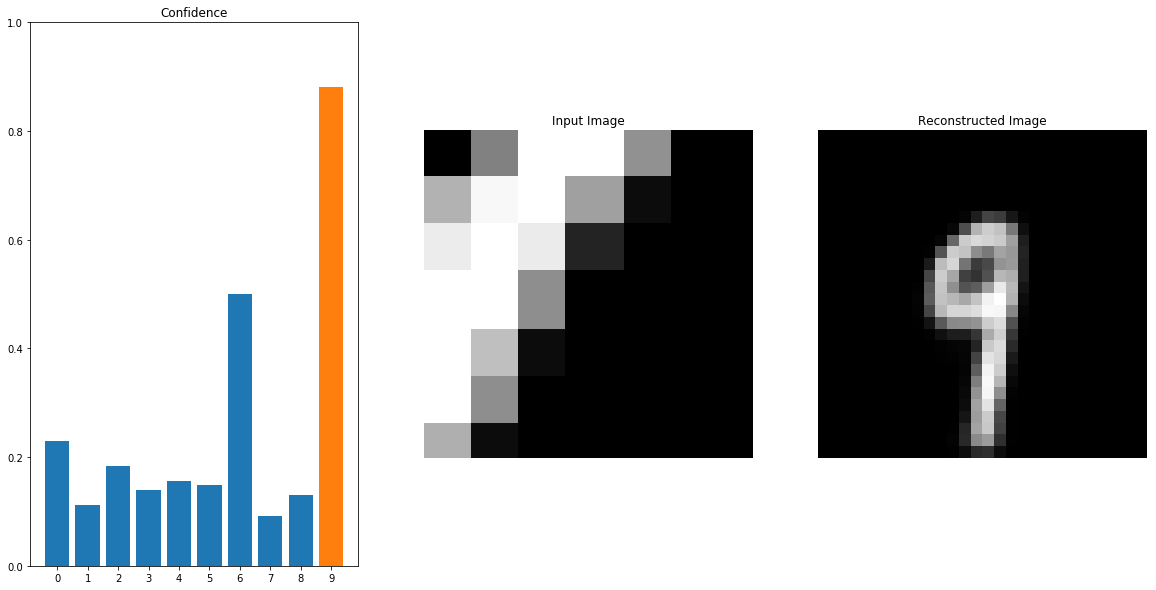

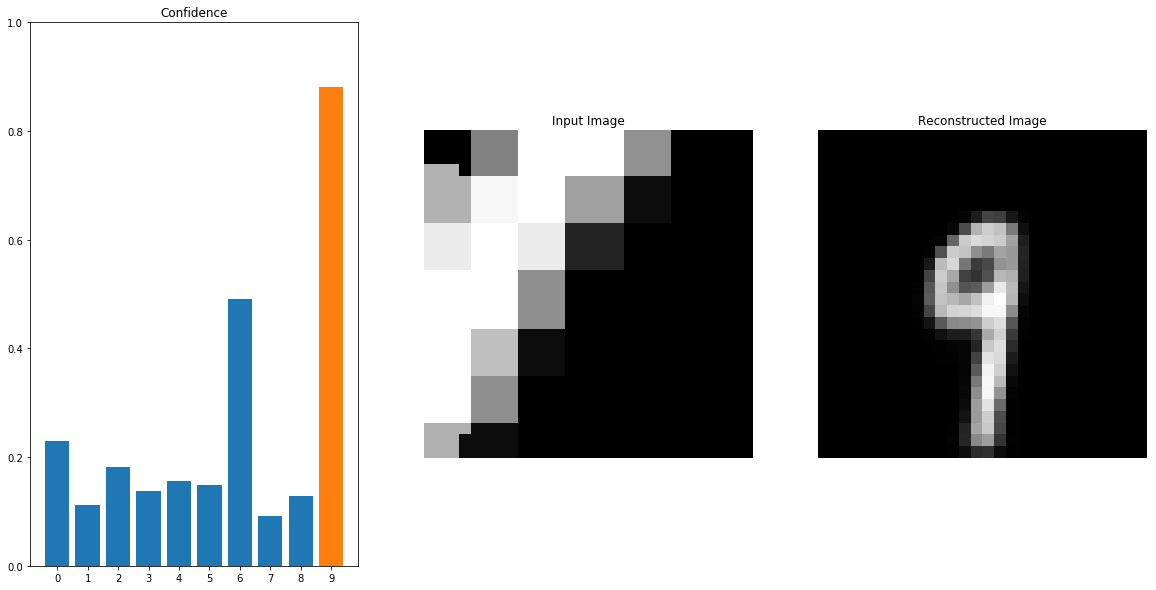

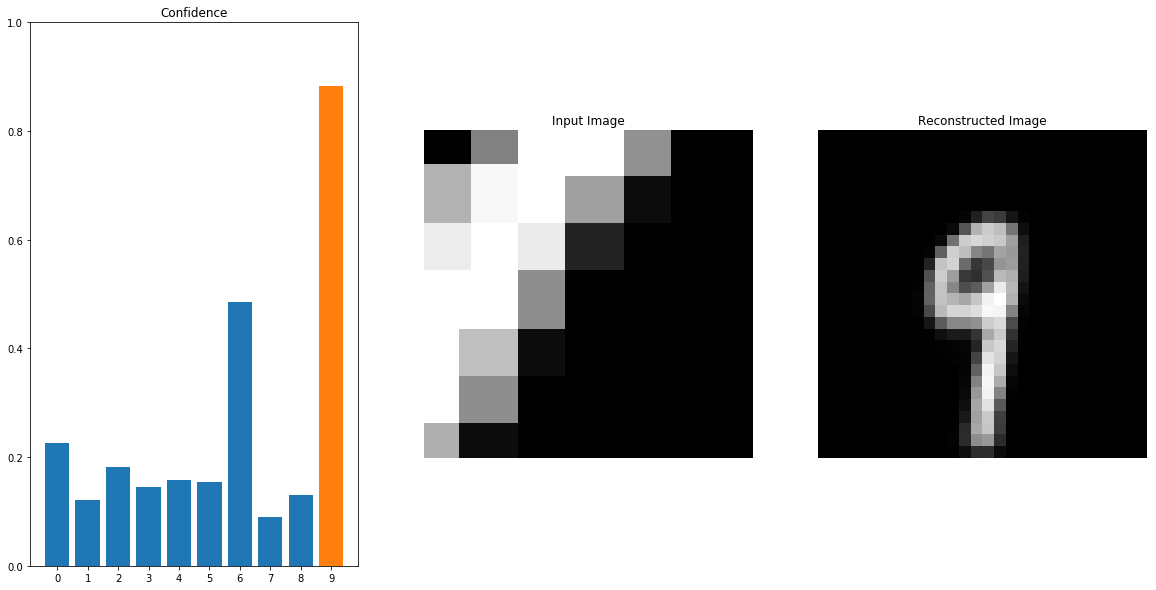

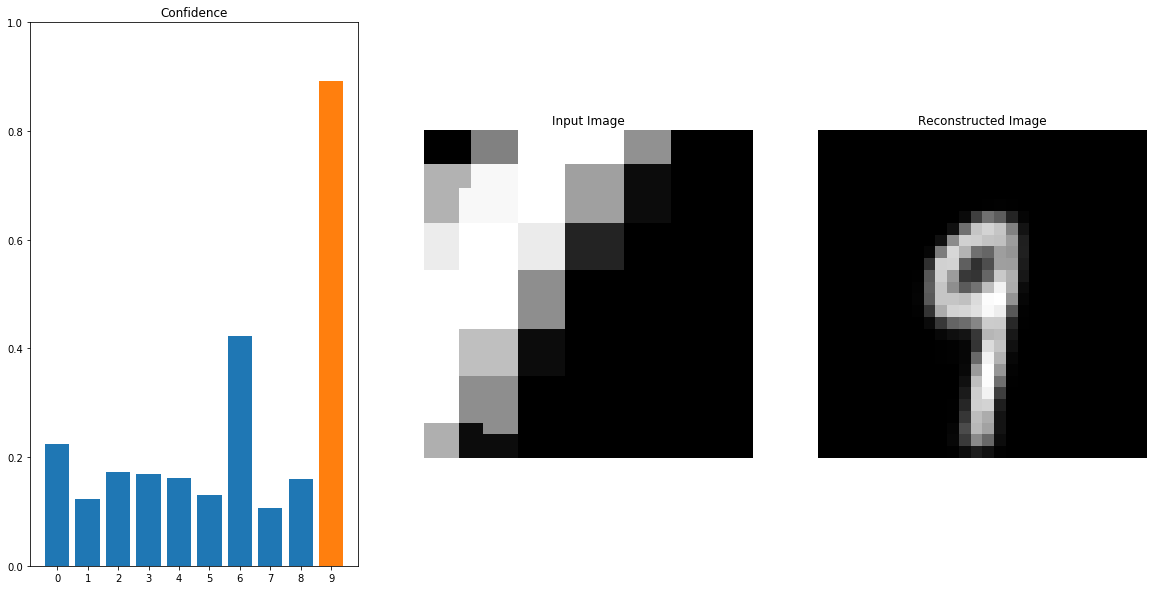

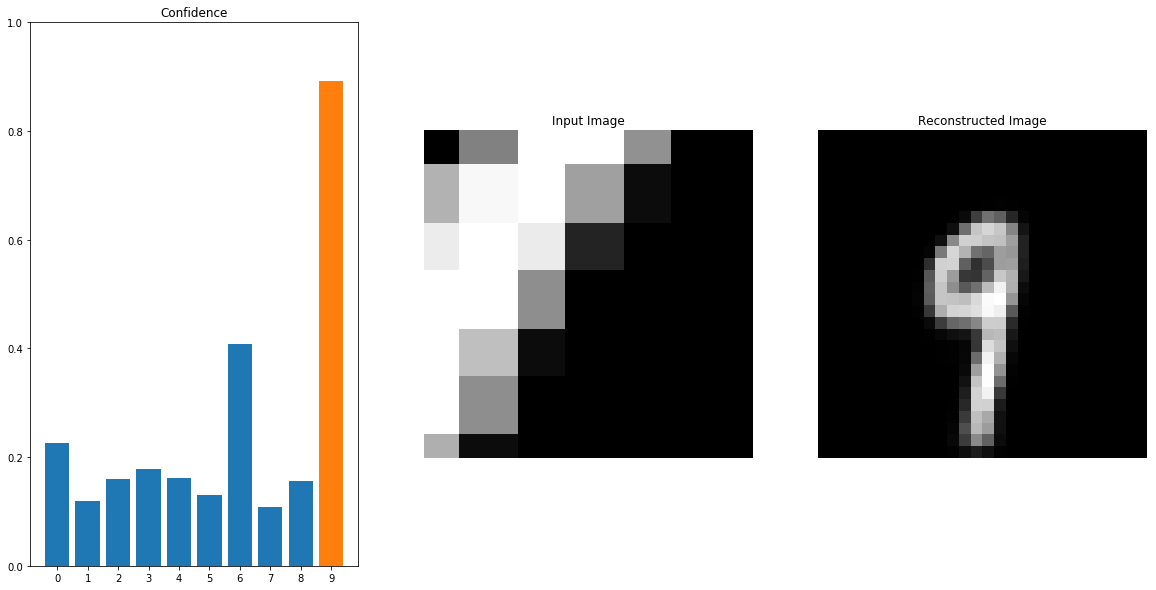

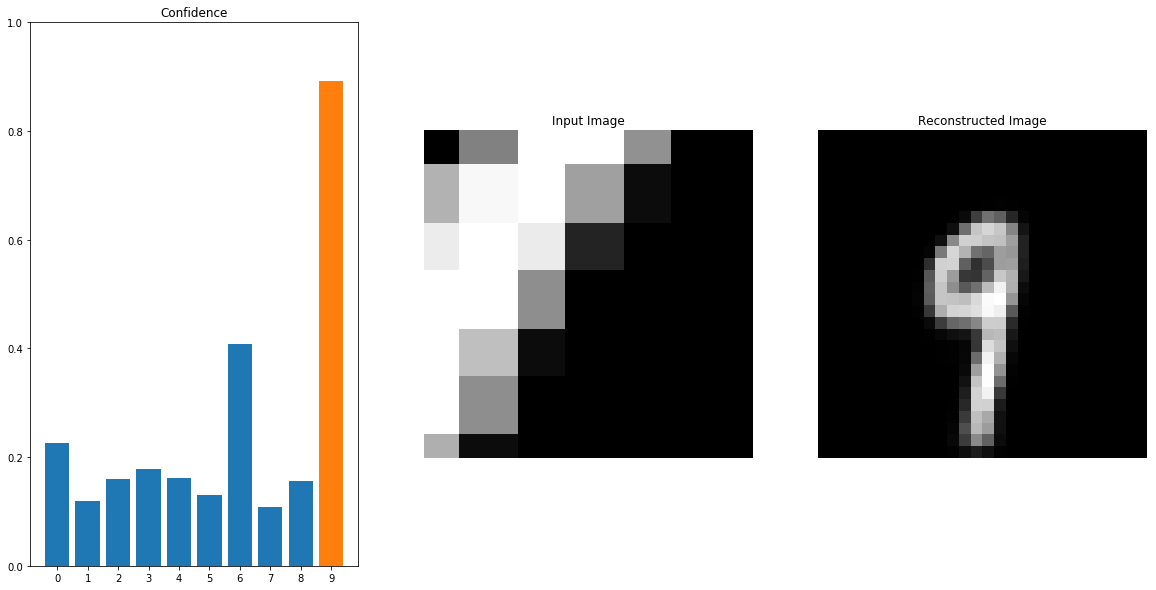

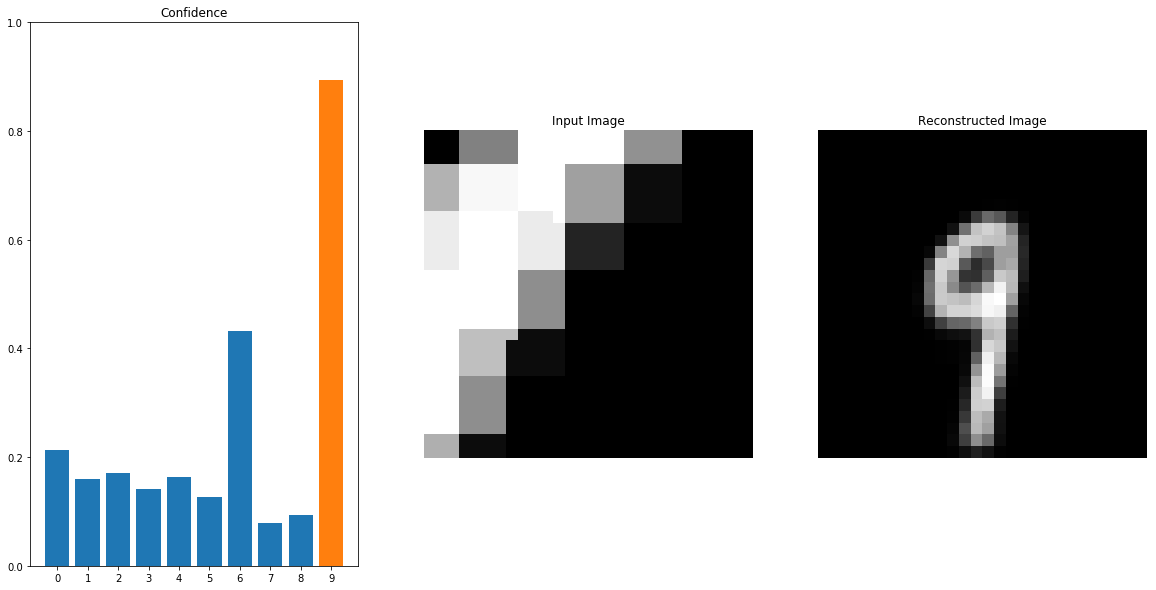

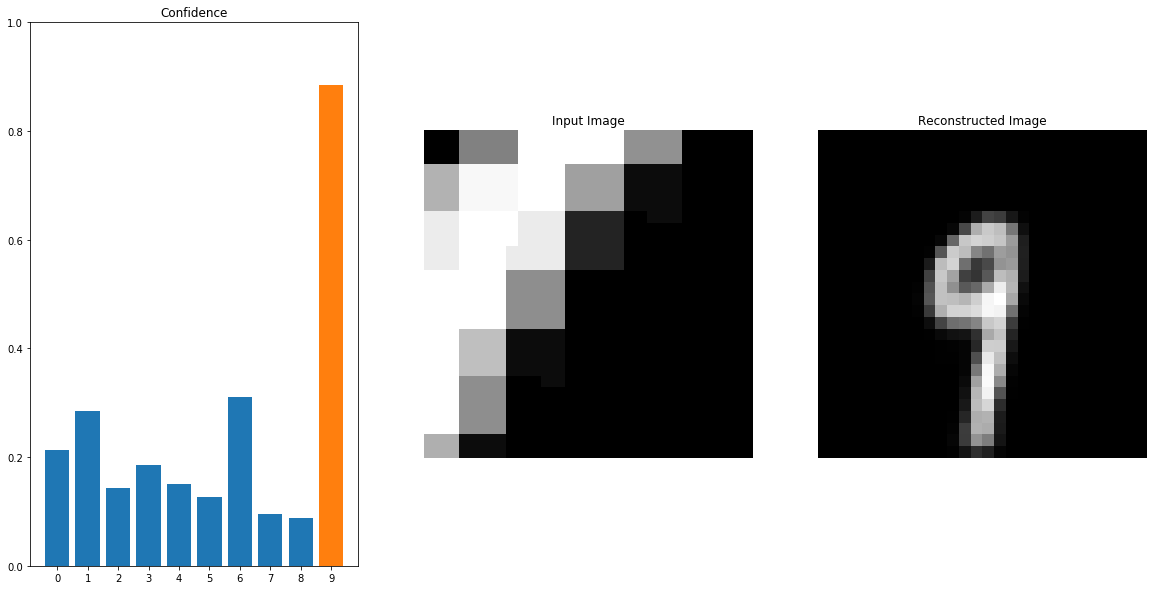

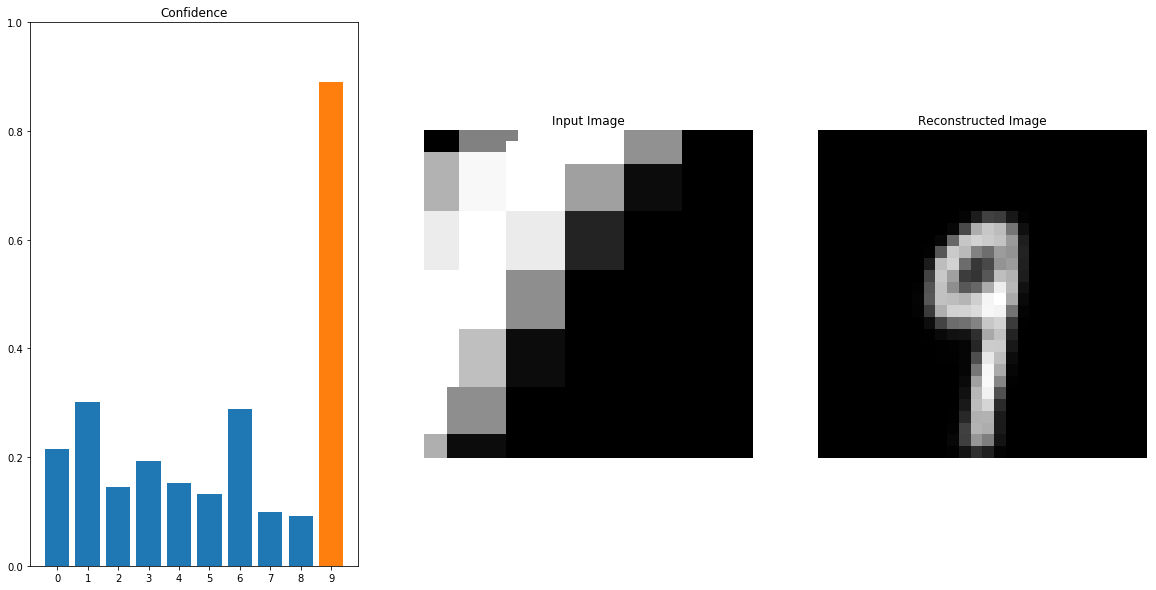

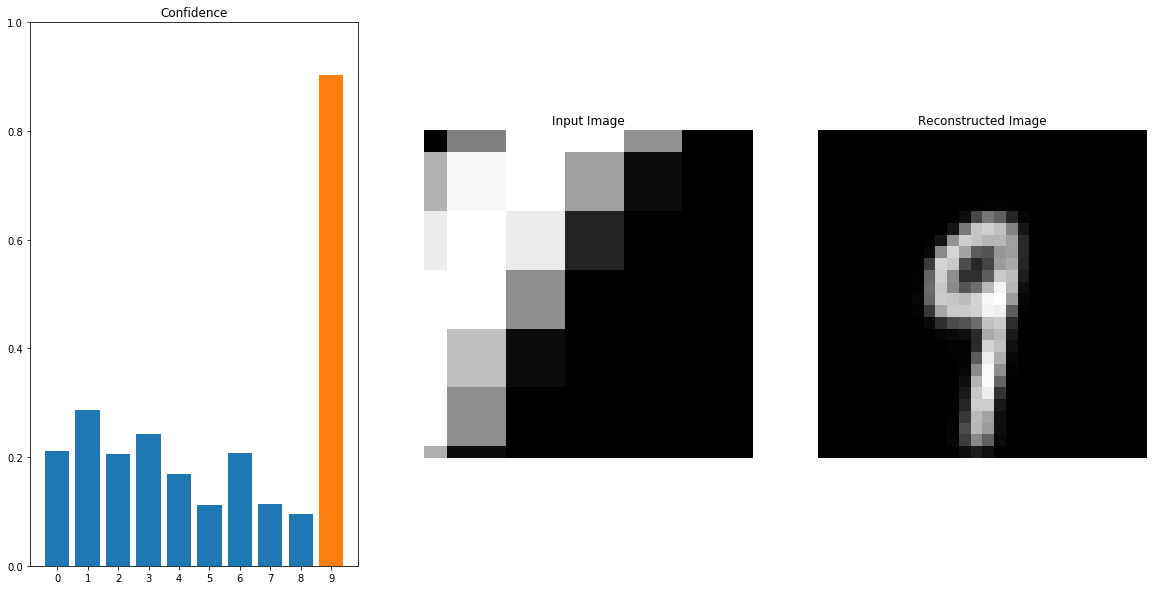

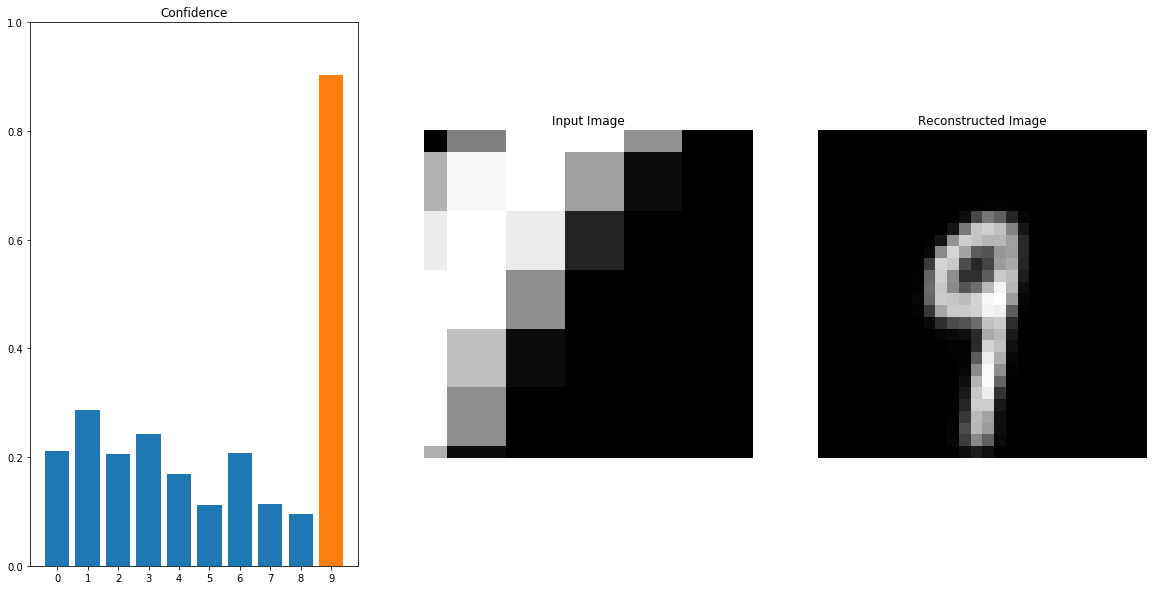

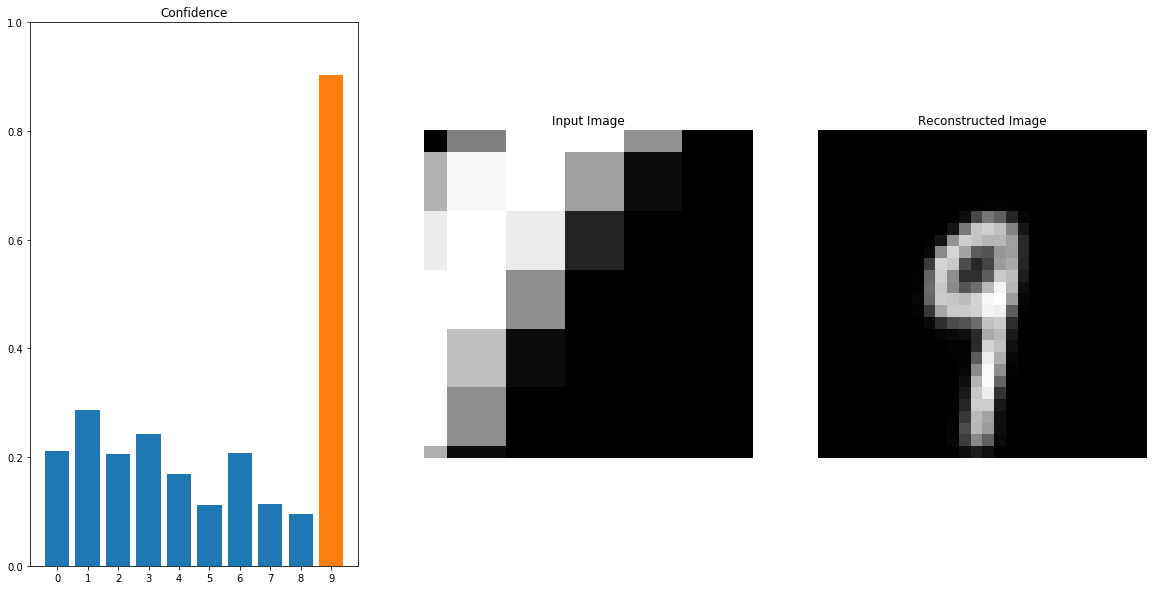

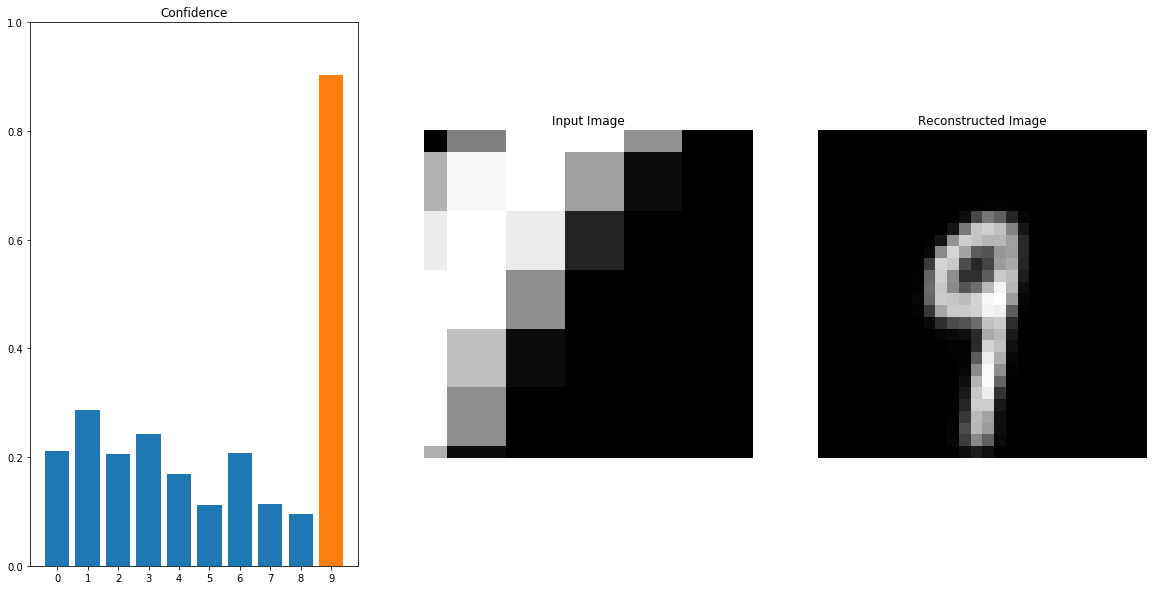

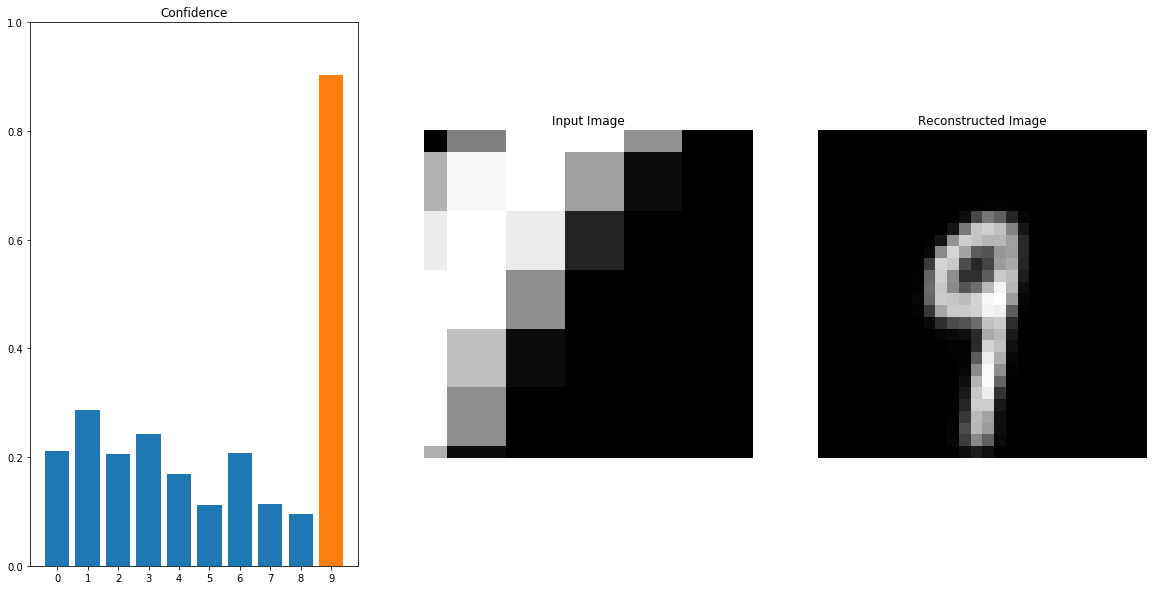

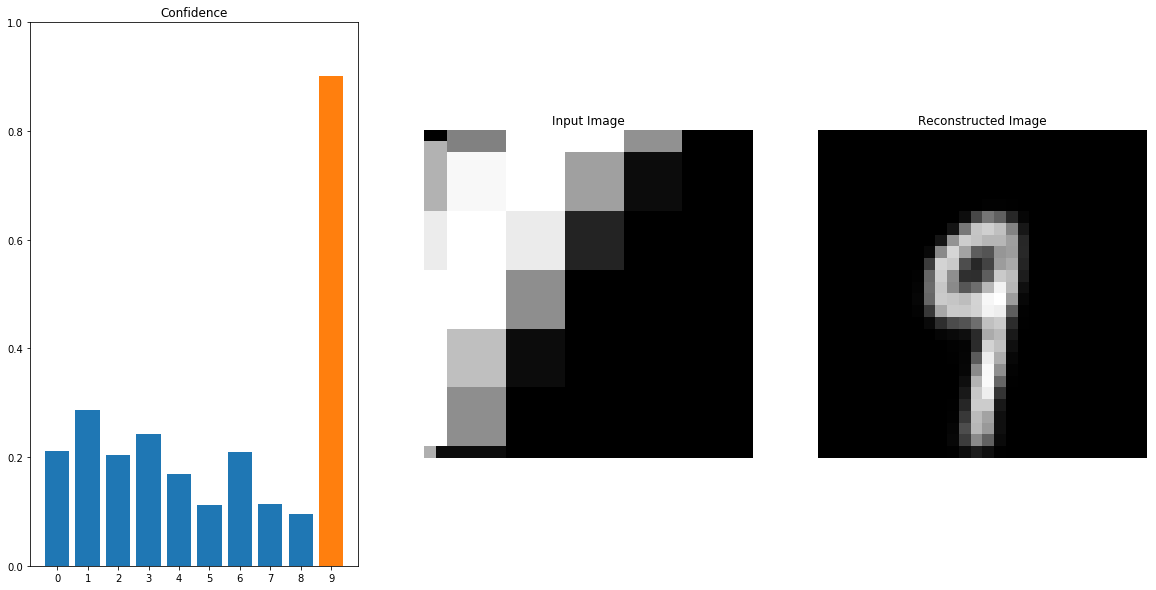

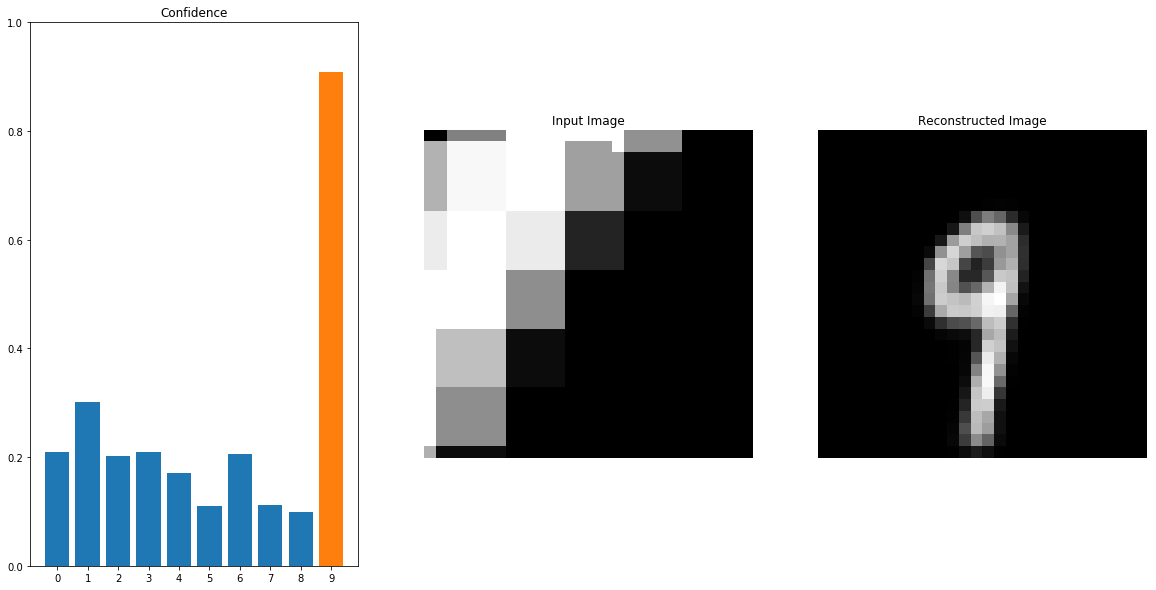

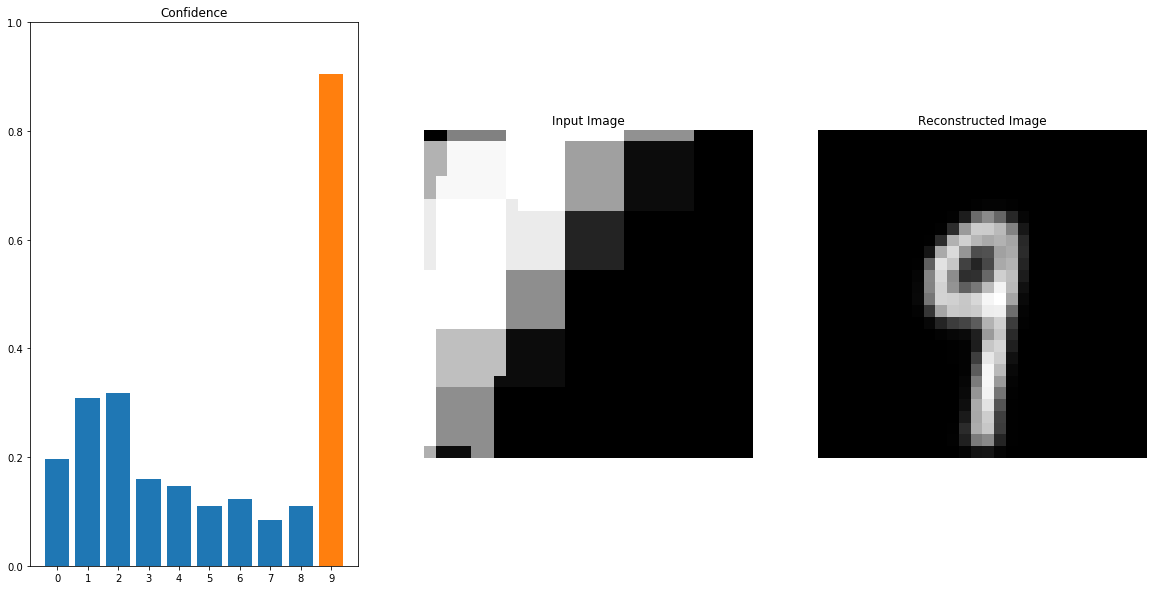

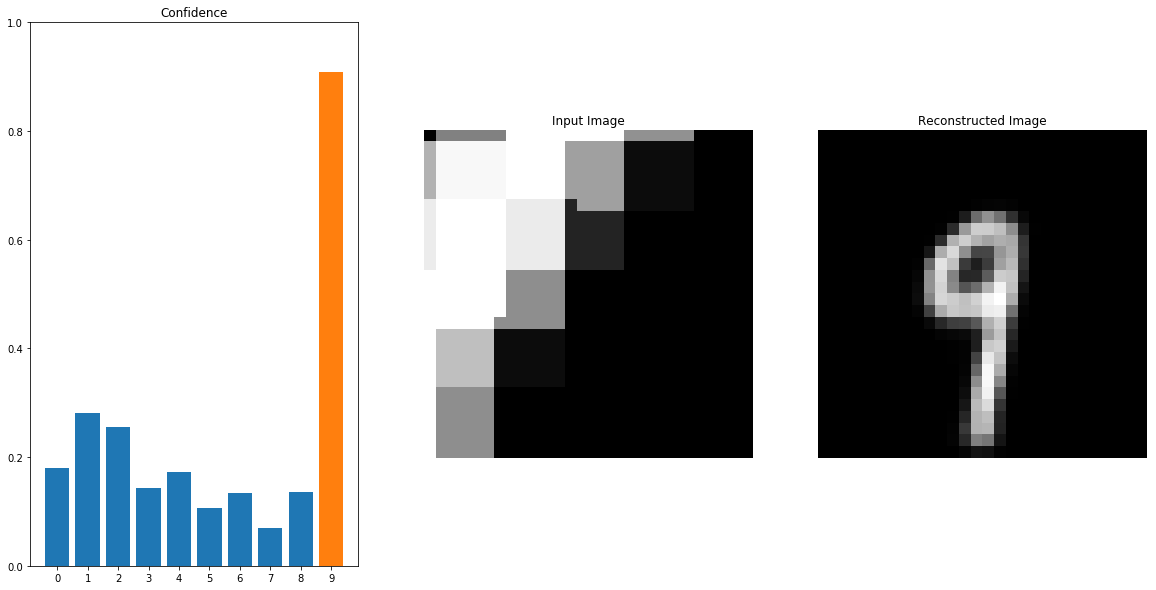

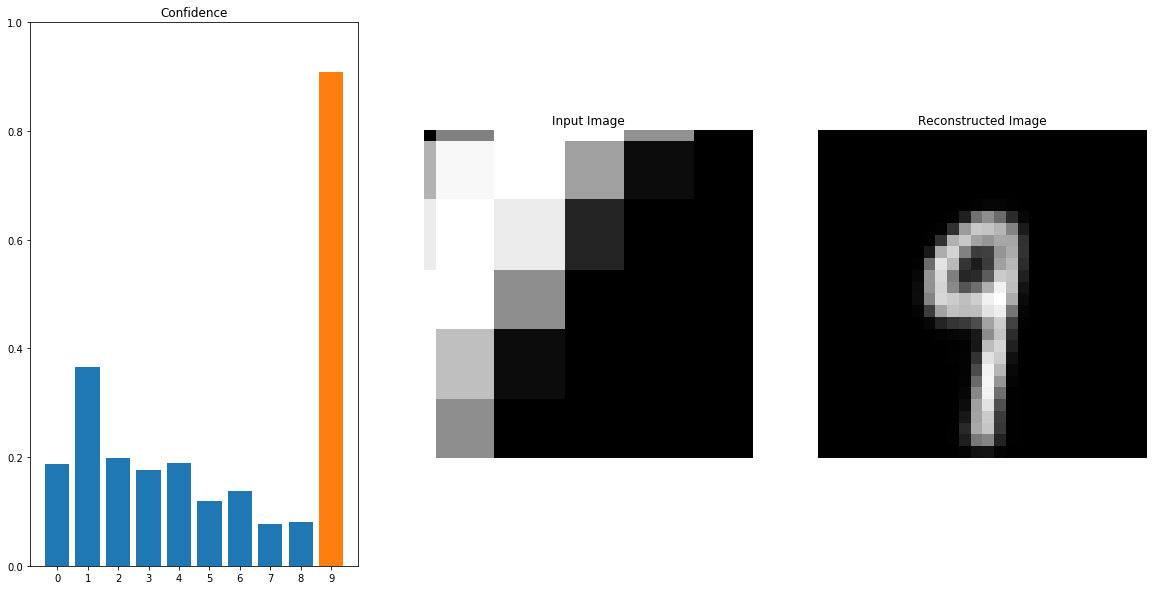

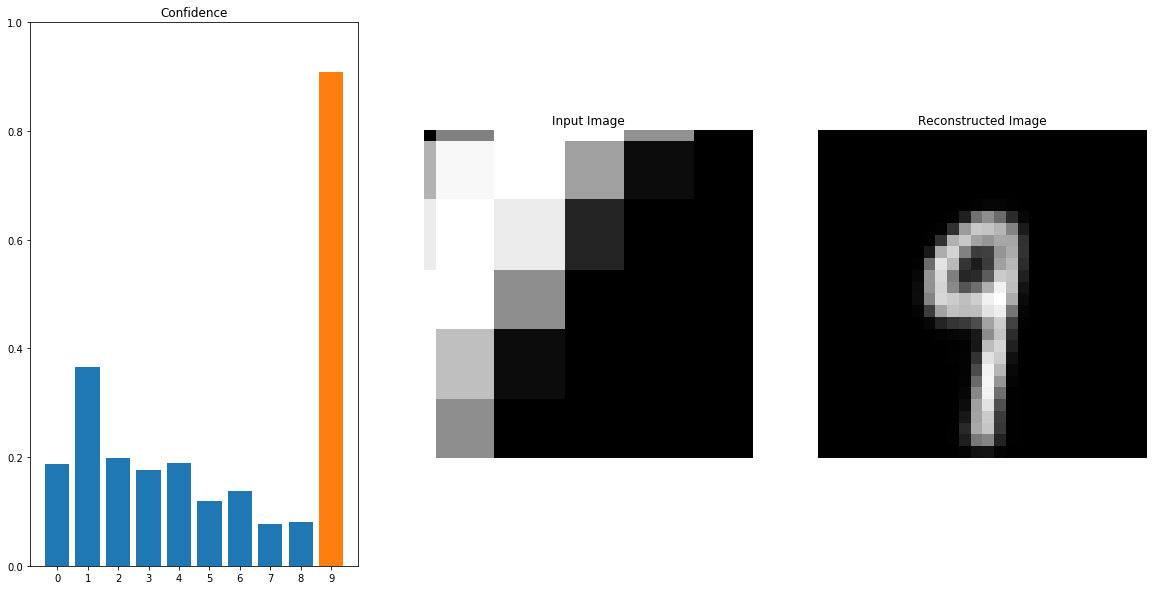

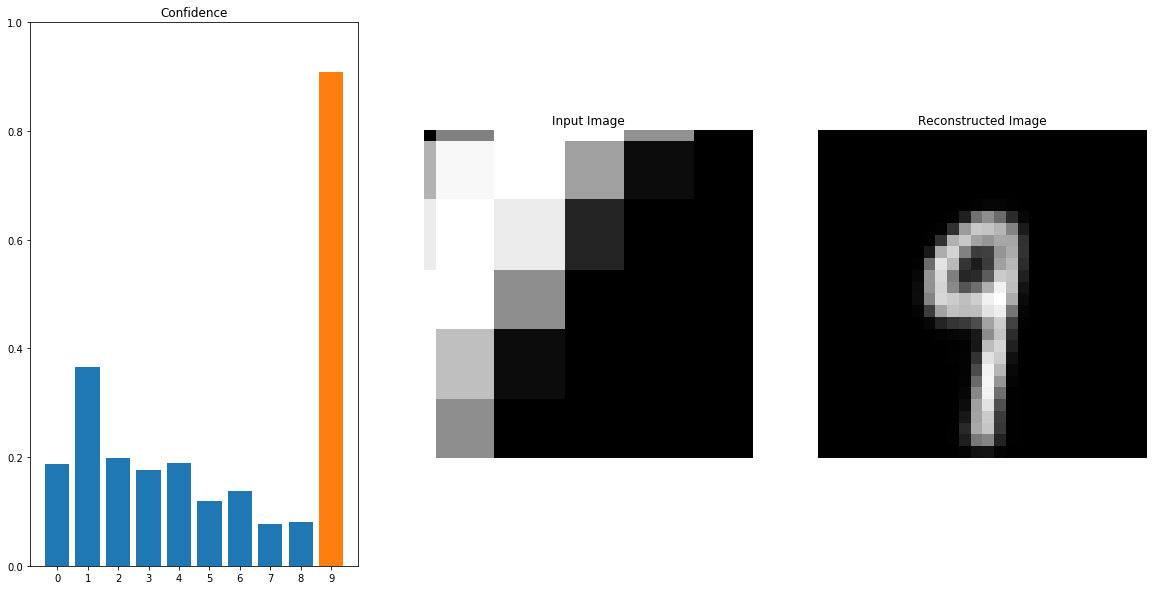

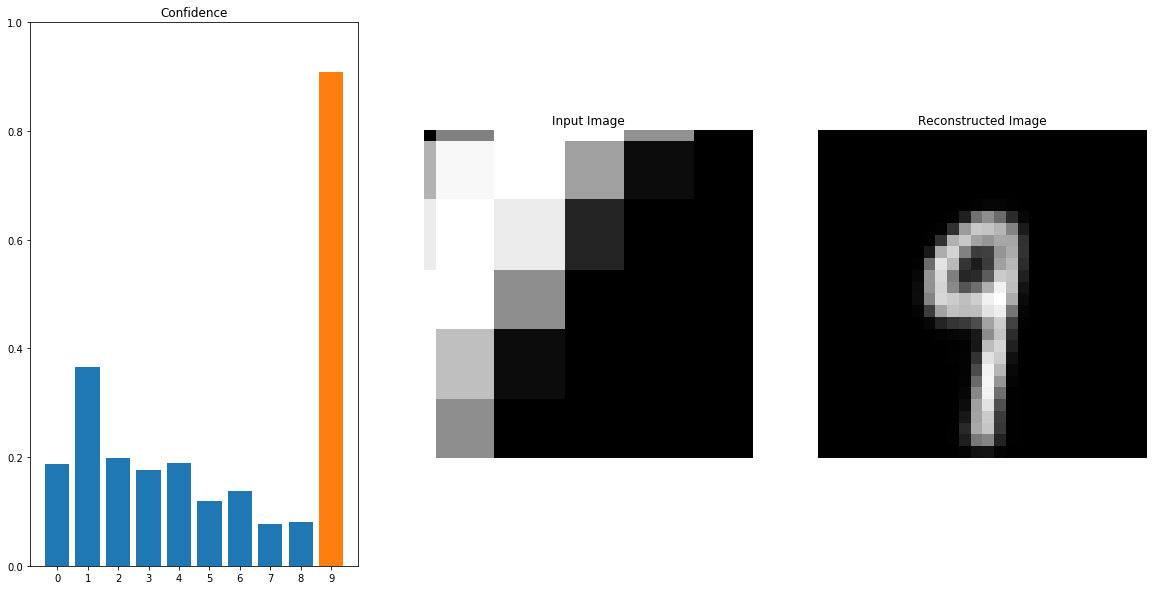

In [5]:
j = 1
for i in tqdm(range(1, 361, 4)):
    _, test_loader = load_mnist(j+1, rotate=0, scale=i/64)
    images, targets = iter(test_loader).next()

    target = targets[j].item()
    output, reconstruction, _ = capsnet(images.cuda())
    output = torch.norm(output, dim=2).data.squeeze()
    pred = output.squeeze().max(dim=1)[1][j].item()
    im = images[j, 0].data.cpu().numpy()
    rec = reconstruction[j,0].data.cpu().numpy()

    plt.figure(figsize=(20,10))
    plt.subplot(1,3,1)
    plt.title("Confidence")
    plt.ylim([0,1])
    plt.bar(range(0,10), output[j])
    plt.bar(pred, output[j,pred])
    plt.xticks(range(10))
    plt.subplot(1,3,2)
    plt.title("Input Image")
    plt.axis('off')
    plt.imshow(im, cmap="gray")
    plt.subplot(1,3,3)
    plt.title("Reconstructed Image")
    plt.axis('off')    
    plt.imshow(rec, cmap="gray")
    plt.savefig("rotation/test{}.png".format(i))

"""
fig = plt.figure()
plt.subplot(1,2,1)
plt.bar(range(0,10), output[j])
pred = output[j].max(dim=0)[1].item()
plt.bar(pred, output[j][pred])
plt.xticks(range(0,10))
plt.subplot(1,2,2)
plt.imshow(im, cmap="gray")
plt.savefig("test.png")
"""

In [ ]:
from tqdm import trange
images = []
for i in trange(1,361,4):
  images.append(imageio.imread("rotation/test{}.png".format(i)))
imageio.mimsave('./movie.gif', images)

100%|██████████| 90/90 [00:14<00:00,  6.00it/s]


100%|██████████| 180/180 [00:43<00:00,  4.16it/s]


tensor(2)


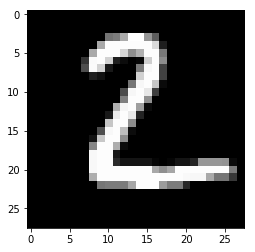

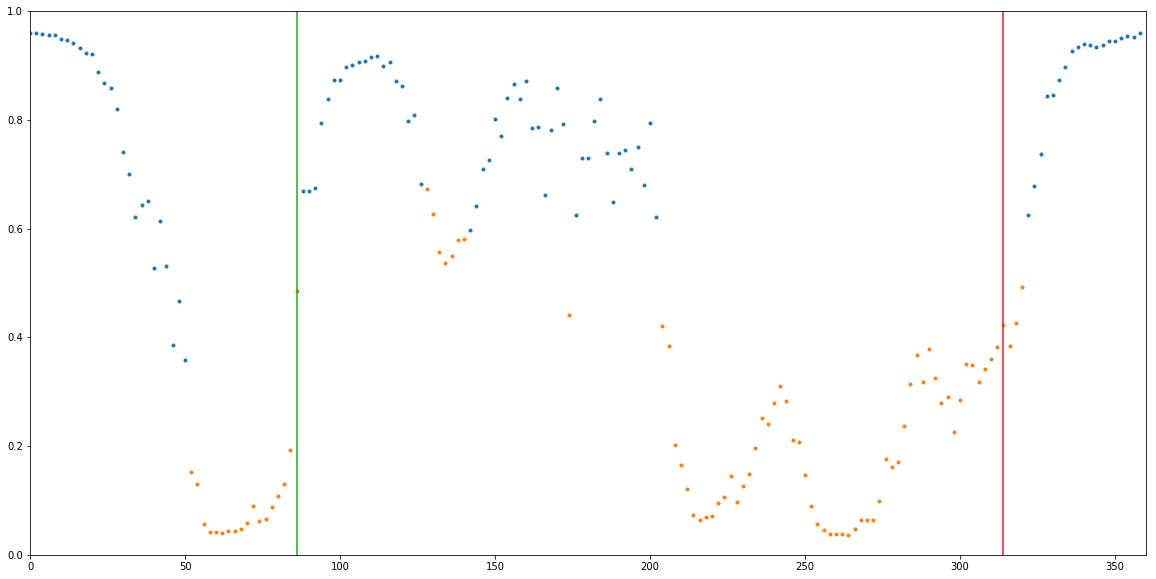

In [5]:
j = 1
confidences_correct = []
confidences_correct_i = []
confidences_false = []
confidences_false_i = []
for i in tqdm(range(0, 360, 2)):
  _, test_loader = load_mnist(j+1, rotate=i)
  images, targets = iter(test_loader).next()

  target = targets[j].item()
  output, reconstruction, _ = capsnet(images.cuda())
  output = torch.norm(output, dim=2)
  pred = output.squeeze().max(dim=1)[1][j].item()
  
  if pred == target:
    confidences_correct.append(output[j,target,0].item())
    confidences_correct_i.append(i)
  else:
    confidences_false.append(output[j,target,0].item())
    confidences_false_i.append(i)
    
# Show Image
_, test_loader = load_mnist(j+1, rotate=0)
images, targets = iter(test_loader).next()
im = images[j, 0].data.numpy()
plt.imshow(im, cmap="gray")

# Print graph
print(targets[j])


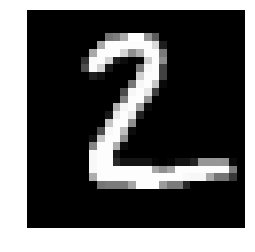

In [8]:
_, test_loader = load_mnist(1+1, rotate=0)
images, targets = iter(test_loader).next()
im = images[1, 0].data.numpy()
plt.axis('off')
plt.imshow(im, cmap="gray")


In [ ]:
plt.figure(figsize=(20,10))
plt.plot(confidences_correct_i, confidences_correct, '.')
plt.plot(confidences_false_i, confidences_false, '.')
plt.xlabel("Rotation degrees")
plt.ylabel("Confidence")
plt.xlim([0,360])
plt.ylim([0,1])